# <a id="index">Table of Contents:</a> 
* [About S&P 500](#about)
* [About the dataset](#datainfo)
* [Research questions](#research)
* [Data Pre-processing](#prep)
    * [Importing Libraries & Modules](#lib) 
    * [Fixing quality/tidy issues & Missing Values](#null)
* [Data Analysis & Visualization](#visual)
    * [PE_ratio distribution](#PE_ratio)
    * [Revenue growth distribution](#Revenue_growth)
    * [Marketcap distribution](#Marketcap)
    * [Volume distribution](#Volume)
    * [Correlation Heatmap](#Heatmap)
    * [Correlation Matrix](#Matrix)
* [Conclusions](#Conclusions)
 
 

# 1. <a id="about">About S&P 500</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>


### The Standard and Poor's 500 or S&P 500 is the most famous financial benchmark in the world.

This stock market index tracks the performance of 500 large companies listed on stock exchanges in the United States. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of this index.


## 2. <a id="datainfo">About the dataset: Overview of Companies under S&P 500</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

### What is the structure of the dataset?

let's go to <a href="https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_index.csv">Kaggle</a>, to find what is the meaning of every column:

#### sp500_companies

- Exchange: Exchange where its stocks are negociated
- Symbol: Company Symbol/Ticker
- Shortname: Company short name
- Longname: Company long name
- Sector: Sector where the company operates
- Industry: Industry, within a sector, where the company operates
- Currentprice: Current stock price
- Marketcap:  Market value of the company's outstanding shares. Calculated using $Current\:Price \times Outstanding\:shares$
- Ebitda: Earnings before interest, taxes, depreciation and amortization.
It is calculated as $EBITDA\: = Net\:Income + Interest + Taxes + Depreciation + Amortization$
- Revenuegrowth:  Increase (or decrease) in a company’s sales from one period to the next. It is calculated as $\dfrac {Current\:Period\:Sales - Prior\:Period\:Sales}{Prior\:Period\:Sales}$
- City: Matrix City
- State: Matrix State
- Country: Matrix Country
- Fulltimeemployees: Number of full time employees
- Longbusinesssummary: Summary of the company
- Weight: Percentage of participation on the S&P index (marketcap %). calculated as $\dfrac{Company\:marker\:cap}{Total\:of\:all\:market\:cap}$ 

#### sp500_stocks.csv

- Date: Date
- Adj Close: Similar to the price at market closure, yet also takes into account company actions such as dividends and splits
- Close: Price at market closure
- High: Maximum value of period
- Low: Minimum value of period
- Open: Price at market opening
- Volume: Volume traded

## 3. <a id="research">Research questions</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

### What is/are the main feature(s) of interest in your dataset?

- Explore the returns, components and volatility of the S&P 500 index.
- Identify high and low performance stocks among the list.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### There are several ways to measure the performance of stocks:
- Market capitalization: Market cap is a measure of a company's size and can be used to determine whether a stock is considered a large-cap, mid-cap, or small-cap stock


- Price-to-earnings ratio (P/E ratio): The P/E ratio is a commonly used metric to determine the relative value of a stock. Stocks with a low P/E ratio are generally considered to be undervalued, while those with a high P/E ratio are considered to be overvalued


- Revenue growth: The revenue growth can be used to measure the performance of a stock over time. Stocks with high revenue growth are generally considered to be performing well


- Volume: The volume of a stock can be used to measure the level of interest in the stock. Stocks with high volume are generally considered to be more liquid and easier to trade



<img src='https://images.unsplash.com/photo-1590283603385-17ffb3a7f29f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=550&q=80' />


# 4. <a id="prep">Data Overview & Pre-processing</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>


## 4.1. <a id="lib">Importing Libraries and Modules</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [284]:
#data visualization
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# stocks related missing info
import yfinance as yf

%matplotlib inline

## 4.2. <a id="null">Fixing quality/tidy issues & Missing Values</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [285]:
stocks = pd.read_csv('sp500_stocks.csv')
print(stocks.shape)
stocks.head()

(1648331, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0


In [286]:
#Because the index includes multiple classes of stock of some
#constituent companies—for example,
#Alphabet's Class A (GOOGL) and Class C (GOOG)—there
#are actually 503 stocks in the gauge.

unique_values_in_stocks = stocks['Symbol'].nunique()
print(unique_values_in_stocks)




503


In [287]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648331 entries, 0 to 1648330
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1648331 non-null  object 
 1   Symbol     1648331 non-null  object 
 2   Adj Close  1576573 non-null  float64
 3   Close      1576573 non-null  float64
 4   High       1576573 non-null  float64
 5   Low        1576573 non-null  float64
 6   Open       1576573 non-null  float64
 7   Volume     1576573 non-null  float64
dtypes: float64(6), object(2)
memory usage: 100.6+ MB


### Fixing tidy issues

In [288]:
# Convert the date column to datetime
stocks['Date'] = pd.to_datetime(stocks['Date'])

# Extract the day, month, and year into separate columns
stocks['Day'] = stocks['Date'].dt.day
stocks['Month'] = stocks['Date'].dt.month
stocks['Year'] =stocks['Date'].dt.year

In [289]:
stocks.Year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023], dtype=int64)

### In this analysis, I will focus on data after 2018

In [290]:
stocks = stocks[stocks.Year > 2018]

In [291]:
print(stocks.Year.unique())
print(stocks.shape)

[2019 2020 2021 2022 2023]
(509539, 11)


### Checking for nulls

In [292]:
stocks.isnull().sum()

Date            0
Symbol          0
Adj Close    3218
Close        3218
High         3218
Low          3218
Open         3218
Volume       3218
Day             0
Month           0
Year            0
dtype: int64

In [293]:
stocks[stocks.High.isnull()]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Day,Month,Year
297194,2019-01-02,CARR,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2019
297195,2019-01-03,CARR,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2019
297196,2019-01-04,CARR,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2019
297197,2019-01-07,CARR,NaN,NaN,NaN,NaN,NaN,NaN,7,1,2019
297198,2019-01-08,CARR,NaN,NaN,NaN,NaN,NaN,NaN,8,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
1179007,2020-03-12,OTIS,NaN,NaN,NaN,NaN,NaN,NaN,12,3,2020
1179008,2020-03-13,OTIS,NaN,NaN,NaN,NaN,NaN,NaN,13,3,2020
1179009,2020-03-16,OTIS,NaN,NaN,NaN,NaN,NaN,NaN,16,3,2020
1179010,2020-03-17,OTIS,NaN,NaN,NaN,NaN,NaN,NaN,17,3,2020


#### Looking for patterns in the dataset:

In [294]:
volume_missing_data = stocks[stocks.Volume.isnull()]
count_missing = volume_missing_data.groupby(['Year'])['Year'].count()
count_missing

Year
2019    1507
2020     865
2021     595
2022     251
Name: Year, dtype: int64

In [295]:
volume_missing_data = stocks[stocks.Volume.isnull()]
count_missing = volume_missing_data.groupby(['Symbol','Year'])['Year'].count()
count_missing

Symbol  Year
CARR    2019    252
        2020     53
CEG     2019    252
        2020    253
        2021    252
        2022     11
CTVA    2019     99
DOW     2019     53
FOX     2019     48
FOXA    2019     47
GEHC    2019    252
        2020    253
        2021    252
        2022    240
OGN     2019    252
        2020    253
        2021     91
OTIS    2019    252
        2020     53
Name: Year, dtype: int64

### No patterns found, so nulls are removed

In [296]:
stocks = stocks.dropna()

In [297]:
stocks.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Day          0
Month        0
Year         0
dtype: int64

In [298]:
print(stocks.shape)
stocks.head()

(506321, 11)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Day,Month,Year
2264,2019-01-02,MMM,170.962708,190.949997,190.990005,186.699997,187.820007,2475200.0,2,1,2019
2265,2019-01-03,MMM,164.525330,183.759995,188.279999,182.889999,188.279999,3358200.0,3,1,2019
2266,2019-01-04,MMM,171.294006,191.320007,191.979996,186.029999,186.750000,2995100.0,4,1,2019
2267,2019-01-07,MMM,170.900070,190.880005,192.300003,188.660004,191.360001,2162200.0,7,1,2019
2268,2019-01-08,MMM,171.616318,191.679993,194.110001,189.580002,193.000000,2479800.0,8,1,2019


In [299]:
company = pd.read_csv('sp500_companies.csv')
company.head(1)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple Pay, a cashless payment service, as well as licenses its intellectual property. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It distributes third-party applications for its products through the App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was incorporated in 1977 and is headquartered in Cupertino, California.",0.059887


### Reduce the text in the summary column

In [300]:
# Define the regular expression pattern to match the first sentence.
pattern = r"(.*?[.!?])"

# Extract the first sentence and store it in a new column
company['short_summary'] = company['Longbusinesssummary'].str.extract(pattern, expand=False)

In [301]:
company = company.drop(['Longbusinesssummary'], axis=1)


In [302]:
print(company.shape)
company.head()

(493, 16)


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Weight,short_summary
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,0.059887,Apple Inc.
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,227.12,1705212379136,9.798300e+10,0.124,Redmond,WA,United States,221000.0,0.049323,"Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide."
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,88.80,1145342394368,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,0.033129,Alphabet Inc.
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,88.02,1142781247488,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,0.033055,Alphabet Inc.
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,87.36,891220525056,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,0.025779,Amazon.


### We can see there is missing company's in the dataset (not 500):

In [303]:
unique_values_in_company = company['Symbol'].nunique()

print(unique_values_in_company)

493


In [304]:
company.isnull().sum()

Exchange              0
Symbol                0
Shortname             0
Longname              0
Sector                0
Industry              0
Currentprice          0
Marketcap             0
Ebitda               43
Revenuegrowth        13
City                  0
State                20
Country               0
Fulltimeemployees     5
Weight                0
short_summary         0
dtype: int64

### Missing States
Don't relevant to the EDA proccess, dropping the entire 'State' column.

In [305]:
company = company.drop(['State'], axis = 1)
company.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City',
       'Country', 'Fulltimeemployees', 'Weight', 'short_summary'],
      dtype='object')

### Missing Fulltimeemployees

In [306]:
company[company.Fulltimeemployees.isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Weight,short_summary
43,NMS,ADBE,Adobe Inc.,Adobe Inc.,Technology,Software—Infrastructure,341.98,158986502144,6.952667e+09,0.101,San Jose,United States,NaN,0.004599,Adobe Inc.
131,NYQ,MET,"MetLife, Inc.","MetLife, Inc.",Financial Services,Insurance—Life,71.34,60008349696,5.432000e+09,-0.160,New York,United States,NaN,0.001736,"MetLife, Inc."
293,NYQ,RJF,"Raymond James Financial, Inc.","Raymond James Financial, Inc.",Financial Services,Capital Markets,110.67,22815948800,NaN,0.047,Saint Petersburg,United States,NaN,0.000660,"Raymond James Financial, Inc."
423,NYQ,CCL,Carnival Corporation,Carnival Corporation & plc,Consumer Cyclical,Travel Services,9.47,12312041472,-1.663001e+09,1.983,Miami,United States,NaN,0.000356,Carnival Corporation & plc operates as a leisure travel company.
467,NMS,FFIV,"F5, Inc.","F5, Inc.",Technology,Software—Infrastructure,143.40,8780295168,5.870410e+08,0.026,Seattle,United States,NaN,0.000254,"F5, Inc."


### The missing values have no relationship with other observed or unobserved data. Decided to fill the nulls by calculate the mean of relevant Industry.

In [307]:
grouped = company.where(company['Industry'].isin(['Software—Infrastructure','Insurance—Life','Capital Markets','Travel Services'])).groupby('Industry')['Fulltimeemployees']

result = grouped.mean()
print(result)

Industry
Capital Markets            41649.750000
Insurance—Life             16858.250000
Software—Infrastructure    58738.714286
Travel Services            38775.000000
Name: Fulltimeemployees, dtype: float64


In [308]:
#fillin the null values
company.loc[company.index==43,'Fulltimeemployees'] = result[2]
company.loc[company.index==131,'Fulltimeemployees'] = result[1]
company.loc[company.index==293,'Fulltimeemployees'] = result[0]
company.loc[company.index==423,'Fulltimeemployees'] = result[3]
company.loc[company.index==467,'Fulltimeemployees'] = result[2]

#convert datatype to int
company['Fulltimeemployees'] = company['Fulltimeemployees'].astype(int)

In [309]:
company[company.Fulltimeemployees.isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Weight,short_summary


### Missing Revenue Growth
We can use Yahoo Finance to extract missing information

In [310]:
#list of symbol names
missing_rg = company[company.Revenuegrowth.isnull()]
missing_rg.Symbol

13        MA
28       MCD
36     CMCSA
197     MSCI
203      XEL
215      PCG
287      DTE
341      MAA
342      WST
377      TXT
408      SWK
430      TFX
435      WDC
Name: Symbol, dtype: object

For those who find the Yfinance library problematic, here is a second way to fill in the nulls:

In [311]:
ticker_symbol_revenue = {'MA':0.2163, 'MCD':0.0327, 'CMCSA':0.0655, 'MSCI':0.147, 'XEL':0.122, 'PCG':0.0701, 'DTE':0.4135, 'MAA':0.4627, 'WST':0.085, 'TXT':0.0294, 'SWK':0.2142, 'TFX':0.0131, 'WDC':0.1106}

company['Revenuegrowth'] = company.Symbol.map(ticker_symbol_revenue).fillna(company['Revenuegrowth'])


In [312]:
company[company.Revenuegrowth.isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Weight,short_summary


### Missing EBITDA

In [313]:
missing_EBITDA = company[company['Ebitda'].isnull()]
count_EBITDA = missing_EBITDA.groupby(['Sector', 'Industry'])['Industry'].count()
count_EBITDA

Sector                  Industry                        
Communication Services  Telecom Services                     1
Consumer Cyclical       Restaurants                          1
Financial Services      Asset Management                     3
                        Banks—Diversified                    4
                        Banks—Regional                      14
                        Capital Markets                      4
                        Credit Services                      5
                        Financial Data & Stock Exchanges     1
                        Insurance—Reinsurance                1
Healthcare              Medical Instruments & Supplies       2
Industrials             Aerospace & Defense                  1
                        Tools & Accessories                  1
Real Estate             REIT—Residential                     1
Technology              Computer Hardware                    1
Utilities               Utilities—Regulated Electric         

### Replace the missing Ebitda value with the AVG Ebitda of companies in the same sector 

In [314]:
grouped2 = company.where(company['Sector'].isin(['Communication Services','Consumer Cyclical','Financial Services','Healthcare', 'Industrials', 'Real Estate', 'Technology', 'Utilities'])).groupby('Sector')['Ebitda']

result2 = grouped2.mean()
print(result2)

Sector
Communication Services    1.807327e+10
Consumer Cyclical         4.462423e+09
Financial Services        3.818836e+09
Healthcare                6.964416e+09
Industrials               3.544509e+09
Real Estate               1.996293e+09
Technology                7.304641e+09
Utilities                 4.276867e+09
Name: Ebitda, dtype: float64


In [315]:
#fillin the null values
company.loc[(company["Sector"] == "Communication Services") & (company["Ebitda"].isnull()),"Ebitda"] = 1.807327e+10
company.loc[(company["Sector"] == "Consumer Cyclical") & (company["Ebitda"].isnull()),"Ebitda"] = 4.462423e+09
company.loc[(company["Sector"] == "Financial Services") & (company["Ebitda"].isnull()),"Ebitda"] = 3.818836e+09
company.loc[(company["Sector"] == "Healthcare") & (company["Ebitda"].isnull()),"Ebitda"] = 6.964416e+09
company.loc[(company["Sector"] == "Industrials") & (company["Ebitda"].isnull()),"Ebitda"] = 3.544509e+09
company.loc[(company["Sector"] == "Real Estate") & (company["Ebitda"].isnull()),"Ebitda"] = 1.996293e+09
company.loc[(company["Sector"] == "Technology") & (company["Ebitda"].isnull()),"Ebitda"] = 7.304641e+09
company.loc[(company["Sector"] == "Utilities") & (company["Ebitda"].isnull()),"Ebitda"] = 4.276867e+09      


In [316]:
company.isnull().sum()

Exchange             0
Symbol               0
Shortname            0
Longname             0
Sector               0
Industry             0
Currentprice         0
Marketcap            0
Ebitda               0
Revenuegrowth        0
City                 0
Country              0
Fulltimeemployees    0
Weight               0
short_summary        0
dtype: int64

In [317]:
#merge the two tables
df = company.merge(stocks, on = 'Symbol')
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497956 entries, 0 to 497955
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Exchange           497956 non-null  object        
 1   Symbol             497956 non-null  object        
 2   Shortname          497956 non-null  object        
 3   Longname           497956 non-null  object        
 4   Sector             497956 non-null  object        
 5   Industry           497956 non-null  object        
 6   Currentprice       497956 non-null  float64       
 7   Marketcap          497956 non-null  int64         
 8   Ebitda             497956 non-null  float64       
 9   Revenuegrowth      497956 non-null  float64       
 10  City               497956 non-null  object        
 11  Country            497956 non-null  object        
 12  Fulltimeemployees  497956 non-null  int32         
 13  Weight             497956 non-null  float64 

 ### Checking for duplicates

In [319]:
df.duplicated().sum()

0

In [320]:
print(df.shape)
df.head()

(497956, 25)


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Weight,short_summary,Date,Adj Close,Close,High,Low,Open,Volume,Day,Month,Year
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,United States,164000,0.059887,Apple Inc.,2019-01-02,38.439735,39.480000,39.712502,38.557499,38.722500,148158800.0,2,1,2019
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,United States,164000,0.059887,Apple Inc.,2019-01-03,34.610851,35.547501,36.430000,35.500000,35.994999,365248800.0,3,1,2019
2,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,United States,164000,0.059887,Apple Inc.,2019-01-04,36.088364,37.064999,37.137501,35.950001,36.132500,234428400.0,4,1,2019
3,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,United States,164000,0.059887,Apple Inc.,2019-01-07,36.008041,36.982498,37.207500,36.474998,37.174999,219111200.0,7,1,2019
4,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,130.15,2070439133184,1.305410e+11,0.081,Cupertino,United States,164000,0.059887,Apple Inc.,2019-01-08,36.694466,37.687500,37.955002,37.130001,37.389999,164101200.0,8,1,2019


# 5. <a id="visual">DATA ANALYSIS & VISUALIZATION</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 5.1. <a id="PE_ratio">PE_ratio distribution</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### Price-to-earnings ratio (P/E ratio): The P/E ratio (Currentprice column / Ebitda column) is a commonly used metric to determine the relative value of a stock. Stocks with a low P/E ratio are generally considered to be undervalued, while those with a high P/E ratio are considered to be overvalued

#### Create a column for Price-to-Earnings ratio

In [321]:
df['PE_ratio'] = df['Currentprice']/df['Ebitda']
df['PE_ratio']

0         9.970048e-10
1         9.970048e-10
2         9.970048e-10
3         9.970048e-10
4         9.970048e-10
              ...     
497951    7.265130e-10
497952    7.265130e-10
497953    7.265130e-10
497954    7.265130e-10
497955    7.265130e-10
Name: PE_ratio, Length: 497956, dtype: float64

### Price-to-Earnings ratio distribution

In [322]:
df['PE_ratio'].describe()

count    4.979560e+05
mean     8.786747e-08
std      1.869863e-07
min     -7.779560e-08
25%      1.333747e-08
50%      3.356784e-08
75%      8.108495e-08
max      2.197076e-06
Name: PE_ratio, dtype: float64

<AxesSubplot: xlabel='PE_ratio'>

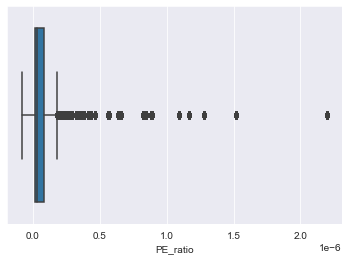

In [323]:
sns.boxplot(data=df, x="PE_ratio")

### PE_ratio outliers

In [324]:
pe_outliers = df[df.Revenuegrowth > 8.108495e-08].Symbol.unique()
pe_outliers

array(['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'BRK-B', 'JNJ', 'XOM',
       'UNH', 'WMT', 'NVDA', 'PG', 'MA', 'CVX', 'HD', 'ABBV', 'MRK',
       'BAC', 'PFE', 'KO', 'PEP', 'AVGO', 'ORCL', 'TMO', 'COST', 'MCD',
       'NKE', 'DHR', 'VZ', 'ACN', 'DIS', 'CMCSA', 'LIN', 'NEE', 'TXN',
       'SCHW', 'ADBE', 'UPS', 'COP', 'RTX', 'HON', 'CRM', 'NFLX', 'UNP',
       'DE', 'IBM', 'QCOM', 'CAT', 'LMT', 'BA', 'CVS', 'TSLA', 'AXP',
       'AMD', 'GILD', 'AMT', 'ADP', 'SYK', 'CB', 'ISRG', 'MDLZ', 'CI',
       'PYPL', 'AMAT', 'MMC', 'PLD', 'BKNG', 'ADI', 'SPGI', 'DUK', 'GE',
       'SLB', 'PGR', 'SO', 'NOW', 'TGT', 'EOG', 'MRNA', 'VRTX', 'CSX',
       'MPC', 'ITW', 'ZTS', 'APD', 'GD', 'FISV', 'CL', 'WM', 'BSX',
       'LRCX', 'CME', 'CCI', 'HUM', 'KLAC', 'SHW', 'NSC', 'EQIX', 'OXY',
       'ICE', 'MCK', 'EMR', 'CHTR', 'PXD', 'DG', 'ORLY', 'MNST', 'VLO',
       'GM', 'KDP', 'GIS', 'F', 'AEP', 'FDX', 'SRE', 'SNPS', 'D', 'MAR',
       'PSA', 'AIG', 'APH', 'JCI', 'ADM', 'TRV', 'HSY', 'KMB', 'AZO',
   

In [325]:
# Remove outliers
df_pe = df[~df.Symbol.isin(['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'BRK-B', 'JNJ', 'XOM',
       'UNH', 'WMT', 'NVDA', 'PG', 'MA', 'CVX', 'HD', 'ABBV', 'MRK',
       'BAC', 'PFE', 'KO', 'PEP', 'AVGO', 'ORCL', 'TMO', 'COST', 'MCD',
       'NKE', 'DHR', 'VZ', 'ACN', 'DIS', 'CMCSA', 'LIN', 'NEE', 'TXN',
       'SCHW', 'ADBE', 'UPS', 'COP', 'RTX', 'HON', 'CRM', 'NFLX', 'UNP',
       'DE', 'IBM', 'QCOM', 'CAT', 'LMT', 'BA', 'CVS', 'TSLA', 'AXP',
       'AMD', 'GILD', 'AMT', 'ADP', 'SYK', 'CB', 'ISRG', 'MDLZ', 'CI',
       'PYPL', 'AMAT', 'MMC', 'PLD', 'BKNG', 'ADI', 'SPGI', 'DUK', 'GE',
       'SLB', 'PGR', 'SO', 'NOW', 'TGT', 'EOG', 'MRNA', 'VRTX', 'CSX',
       'MPC', 'ITW', 'ZTS', 'APD', 'GD', 'FISV', 'CL', 'WM', 'BSX',
       'LRCX', 'CME', 'CCI', 'HUM', 'KLAC', 'SHW', 'NSC', 'EQIX', 'OXY',
       'ICE', 'MCK', 'EMR', 'CHTR', 'PXD', 'DG', 'ORLY', 'MNST', 'VLO',
       'GM', 'KDP', 'GIS', 'F', 'AEP', 'FDX', 'SRE', 'SNPS', 'D', 'MAR',
       'PSA', 'AIG', 'APH', 'JCI', 'ADM', 'TRV', 'HSY', 'KMB', 'AZO',
       'CTAS', 'CDNS', 'PSX', 'HES', 'CTVA', 'MSI', 'CNC', 'A', 'EXC',
       'ECL', 'NXPI', 'FIS', 'KMI', 'PAYX', 'TT', 'DVN', 'ADSK', 'MCHP',
       'CMG', 'SYY', 'RSG', 'STZ', 'LVS', 'NUE', 'IQV', 'PH', 'WMB',
       'MSCI', 'TEL', 'BK', 'SPG', 'XEL', 'DD', 'YUM', 'IDXX', 'ALL', 'O',
       'CARR', 'HAL', 'HLT', 'TDG', 'PCG', 'ANET', 'ODFL', 'EA', 'CMI',
       'PCAR', 'ED', 'AMP', 'KR', 'MTD', 'ABC', 'DHI', 'AME', 'ILMN',
       'DLTR', 'KEYS', 'PEG', 'SBAC', 'CTSH', 'ROK', 'BF-B', 'GPN', 'BKR',
       'ENPH', 'PPG', 'RMD', 'WEC', 'DFS', 'CSGP', 'LYB', 'OKE', 'WELL',
       'ES', 'LEN', 'GWW', 'DLR', 'IFF', 'ON', 'FAST', 'URI', 'IT',
       'APTV', 'ZBH', 'ALB', 'ULTA', 'CBRE', 'EIX', 'FANG', 'HRL', 'EFX',
       'CDW', 'TSCO', 'K', 'GPC', 'FE', 'ARE', 'TSN', 'VMC', 'FTV', 'DAL',
       'DTE', 'ACGL', 'VRSN', 'AEE', 'PFG', 'RJF', 'IR', 'AVB', 'PPL',
       'MKC', 'BAX', 'FRC', 'EQR', 'HPE', 'ETR', 'ANSS', 'MLM', 'HBAN',
       'LUV', 'MRO', 'CHD', 'CAH', 'CTRA', 'XYL', 'STLD', 'VICI', 'DOV',
       'PWR', 'EXR', 'NTRS', 'WAT', 'CAG', 'WRB', 'DRI', 'CNP', 'MTB',
       'STE', 'VTR', 'TDY', 'WAB', 'CMS', 'JBHT', 'EXPD', 'EPAM', 'OMC',
       'AES', 'AMCR', 'ROL', 'MAA', 'WST', 'INVH', 'IEX', 'MPWR', 'MGM',
       'PAYC', 'CFG', 'FOX', 'MOS', 'BALL', 'INCY', 'SJM', 'MOH', 'FOXA',
       'TRGP', 'HWM', 'COO', 'PKI', 'CF', 'CPB', 'BRO', 'NVR', 'FMC',
       'BR', 'J', 'LYV', 'ATO', 'SWKS', 'TXT', 'FLT', 'AVY', 'ETSY',
       'FDS', 'ZBRA', 'SEDG', 'PTC', 'EVRG', 'CPRT', 'IRM', 'RCL', 'LW',
       'IP', 'EXPE', 'NTAP', 'PEAK', 'LDOS', 'UAL', 'NDSN', 'IPG', 'APA',
       'LNT', 'RE', 'ESS', 'AKAM', 'SWK', 'JKHY', 'TECH', 'EQT', 'TYL',
       'KIM', 'CBOE', 'SNA', 'POOL', 'CE', 'PKG', 'MTCH', 'CCL', 'PHM',
       'GL', 'DPZ', 'MKTX', 'TTWO', 'TFX', 'CPT', 'EMN', 'UHS', 'UDR',
       'WDC', 'CRL', 'HST', 'NWS', 'TPR', 'NWSA', 'HSIC', 'NI', 'REG',
       'DXCM', 'NDAQ', 'JNPR', 'BXP', 'BWA', 'ALLE', 'CDAY', 'WRK', 'AAL',
       'CZR', 'AAP', 'HII', 'FFIV', 'CMA', 'PNW', 'RL', 'RHI', 'FTNT',
       'DVA', 'FRT', 'NRG', 'ZION', 'PNR', 'SEE', 'MHK', 'SBNY', 'GNRC',
       'ALK', 'NCLH', 'LNC'])]

<AxesSubplot: xlabel='PE_ratio'>

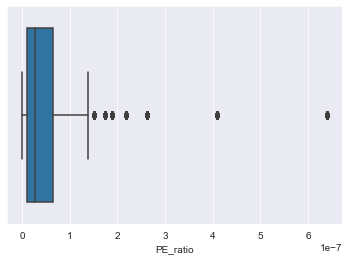

In [326]:
sns.boxplot(data=df_pe, x="PE_ratio")

In [327]:
df_pe['PE_ratio'].describe()

count    1.013590e+05
mean     5.390758e-08
std      8.443514e-08
min      3.591978e-10
25%      1.045324e-08
50%      2.730288e-08
75%      6.531571e-08
max      6.395113e-07
Name: PE_ratio, dtype: float64

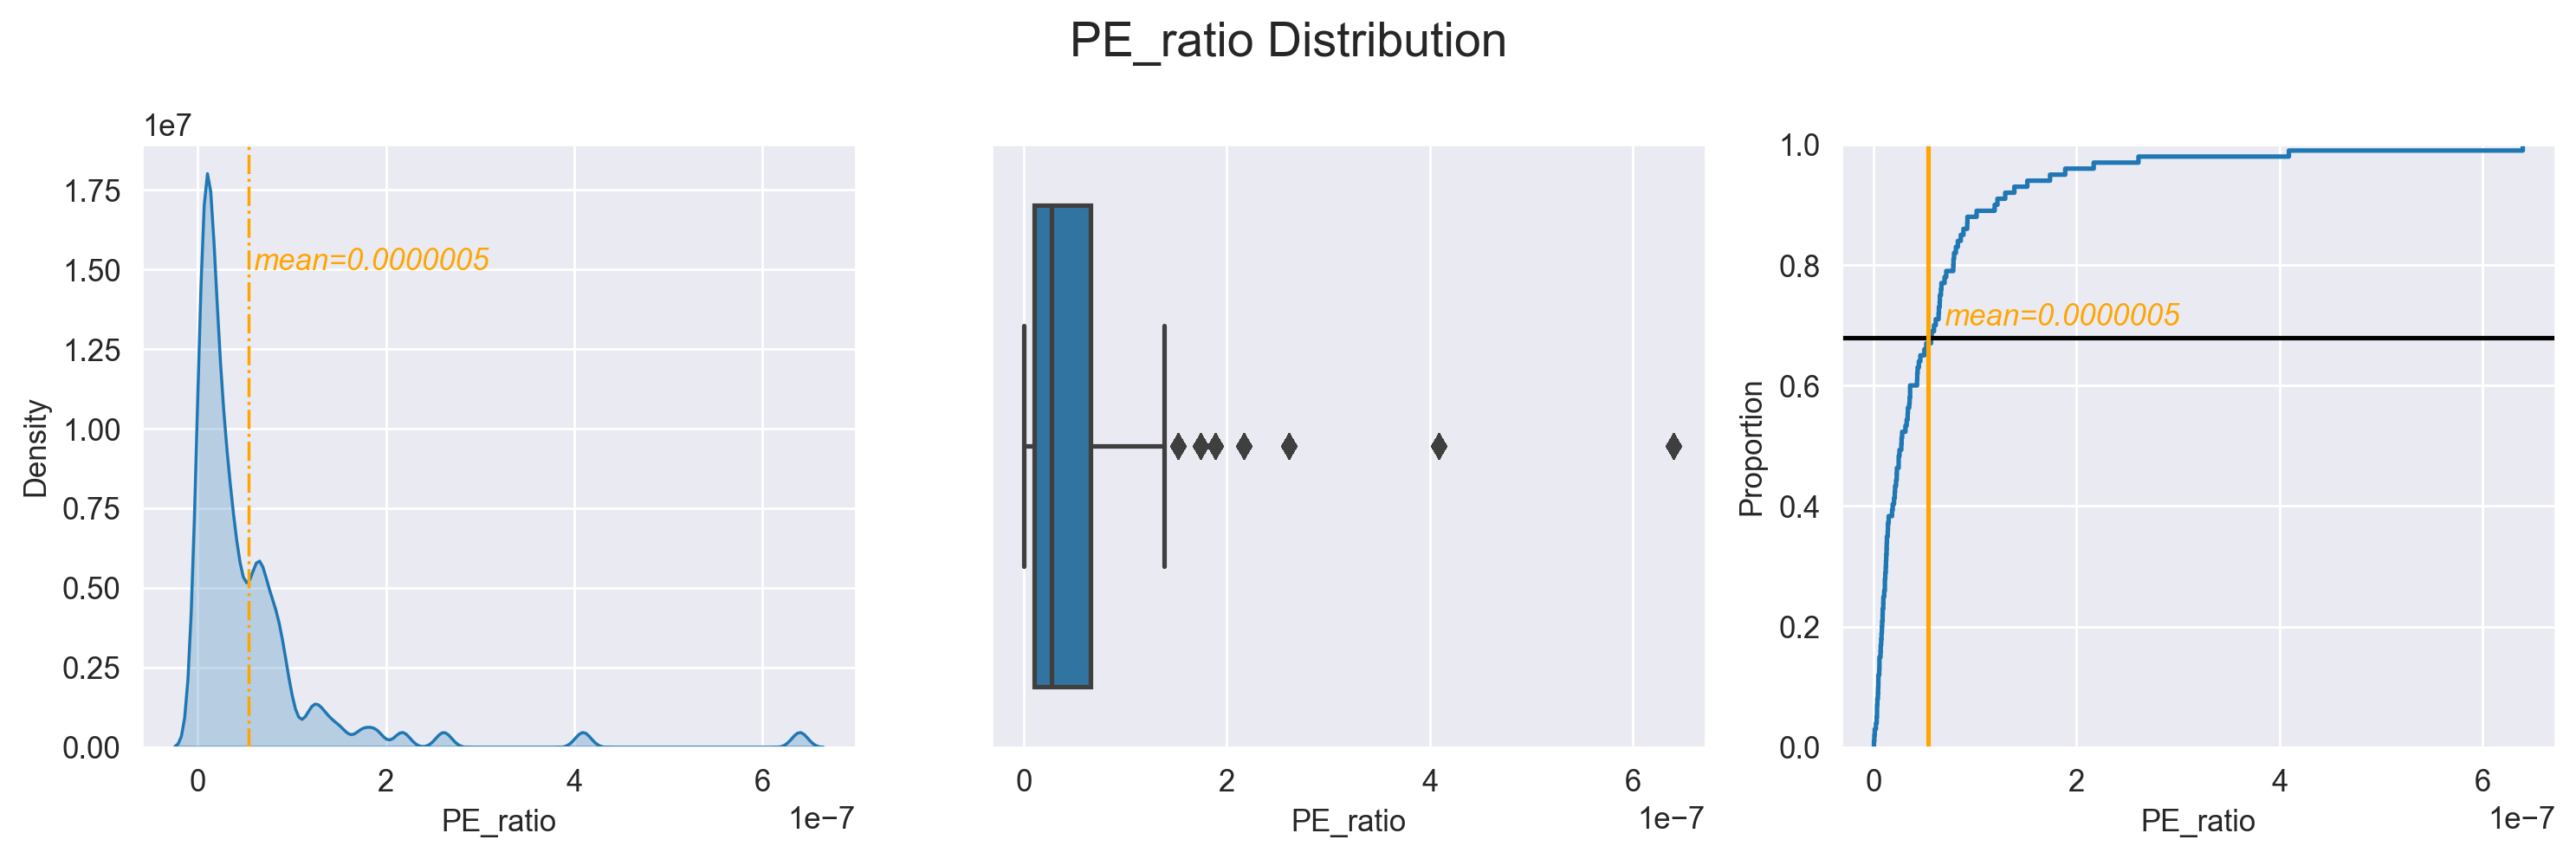

In [328]:
# set style
sns.set_style('darkgrid')

# creating 3 subplots axes[0], axes[1], axes[2]
fig, axes = plt.subplots(1, 3, figsize=[12, 4], dpi=250)

# main title:
fig.suptitle("PE_ratio Distribution", fontsize=16)

# the plots:
sns.kdeplot(data=df_pe, x="PE_ratio", fill=True, ax=axes[0])
sns.boxplot(data=df_pe, x="PE_ratio", ax=axes[1])
sns.ecdfplot(data=df_pe, x="PE_ratio", ax=axes[2])

# histogram customization:
mean_price = np.round(df_pe["PE_ratio"].mean(), 10)
axes[0].axvline(mean_price, color="orange", linestyle="-.", linewidth=1)

axes[0].text(
    x= 1.1 * mean_price , y= 1.5 * 1e7 , s=f"mean=0.0000005", style="italic", color="orange"
)

# ecdf customization
axes[2].axhline(0.68, color="black")
axes[2].axvline(mean_price, color="orange")
axes[2].text(x=1.3*mean_price, y=0.7, s=f"mean=0.0000005", style="italic", color="orange")

plt.tight_layout()

In [329]:
mean_price

5.39e-08

#### Observations:

* From the histogram and the box plot we could see that the PE_ratio is right skewed, with many outliers, we could see that the range is from 0 to 0.00000009 (after I removed the outliers above 0.00000009), and the mean value is 0.0000005
* From the ECDF price plot we could see that 68% from the companies are below the mean
* Stocks with a low P/E ratio are generally considered to be undervalued, while those with a high P/E ratio are considered to be overvalued. Therefore, all companies with PE_ratios higher than the mean are considered overvalued

## 5.2. <a id="Revenue_growth">Revenue growth distribution</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### Revenue growth: The revenue growth (Revenuegrowth column) can be used to measure the performance of a stock over time. Stocks with high revenue growth are generally considered to be performing well

## Revenue growth distribution

In [330]:
df.Revenuegrowth = round(df.Revenuegrowth,4)
df.Revenuegrowth

0         0.081
1         0.081
2         0.081
3         0.081
4         0.081
          ...  
497951   -0.063
497952   -0.063
497953   -0.063
497954   -0.063
497955   -0.063
Name: Revenuegrowth, Length: 497956, dtype: float64

In [331]:
df.Revenuegrowth.describe() 

count    497956.000000
mean          0.801769
std          12.342016
min          -0.643000
25%           0.020000
50%           0.090000
75%           0.196000
max         270.791000
Name: Revenuegrowth, dtype: float64

<AxesSubplot: xlabel='Revenuegrowth'>

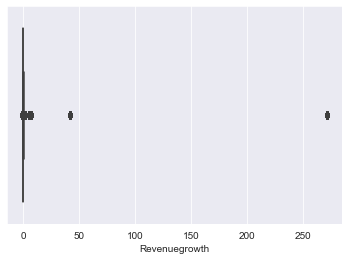

In [332]:
sns.boxplot(data=df, x="Revenuegrowth")

### Revenuegrowth outliers

In [333]:
revenuegrowth_outliers = df[df.Revenuegrowth > 1].Symbol.unique()
revenuegrowth_outliers

array(['COP', 'ALB', 'CTRA', 'LYV', 'RCL', 'EQT', 'CCL', 'HST', 'NCLH'],
      dtype=object)

#### Decide to remove the outliers 

In [334]:
df_revenue = df[~df.Symbol.isin(['COP', 'ALB', 'CTRA', 'LYV', 'RCL', 'EQT', 'CCL', 'HST', 'NCLH'])]

In [335]:
df_revenue.Revenuegrowth.describe() 

count    488839.000000
mean          0.129814
std           0.204306
min          -0.643000
25%           0.019000
50%           0.088000
75%           0.189000
max           1.000000
Name: Revenuegrowth, dtype: float64

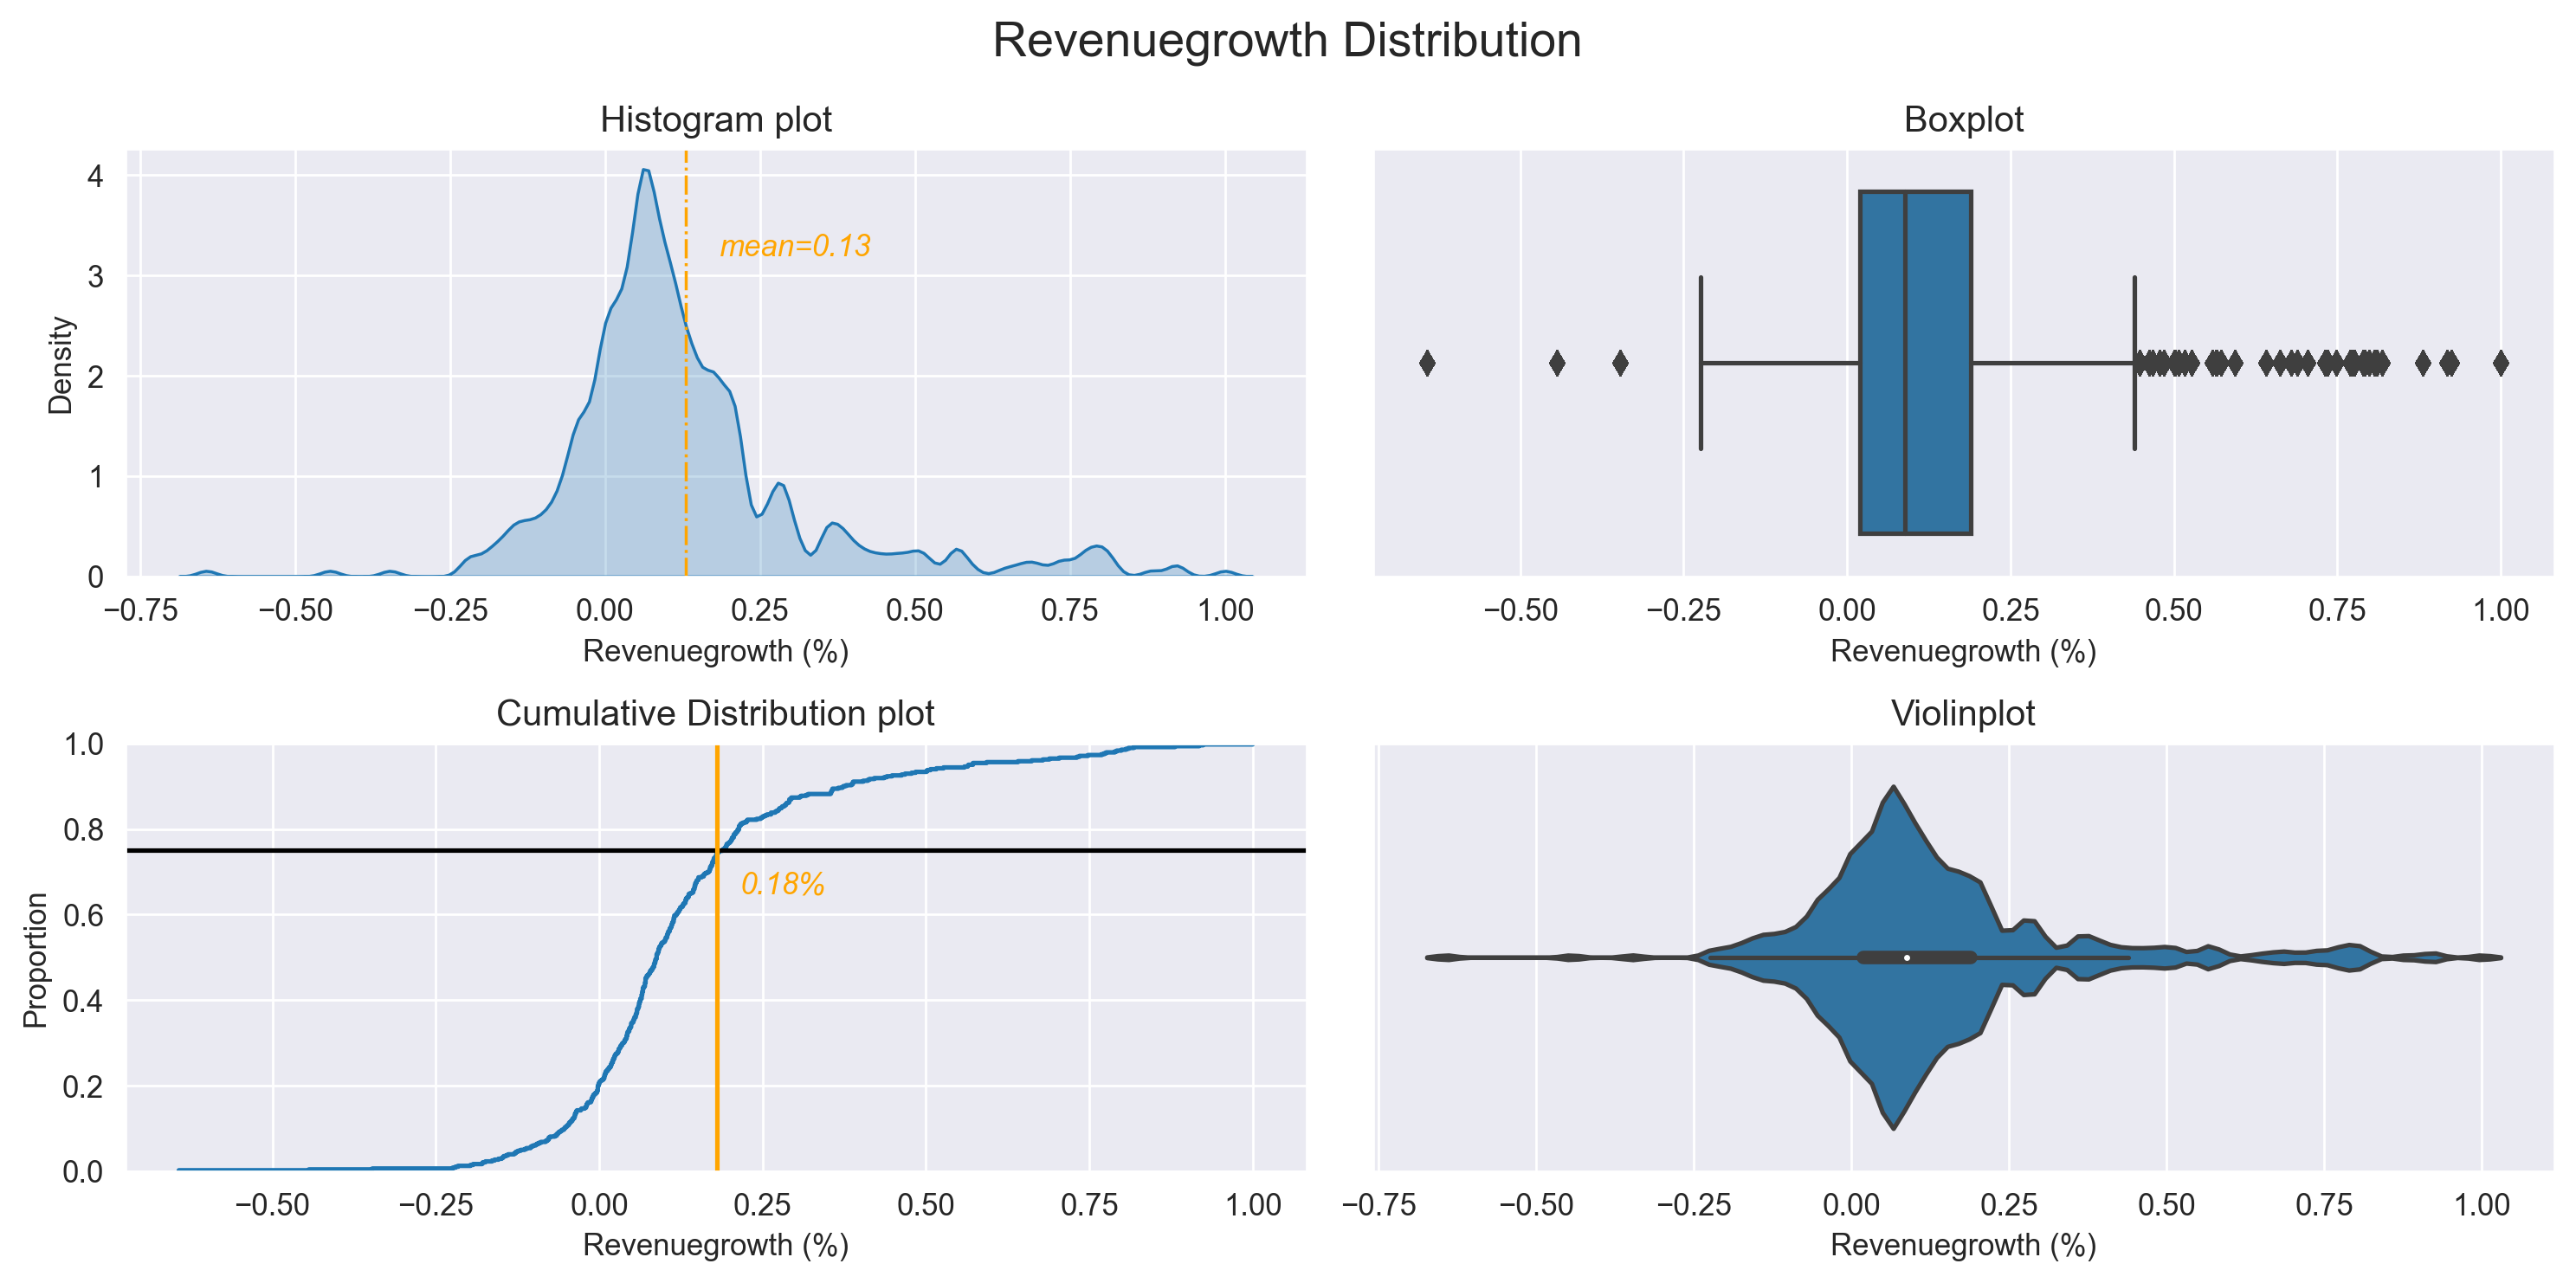

In [336]:
# set style
sns.set_style('darkgrid')

# creating 4 subplots axes[0][0], axes[0][1], axes[1][0], axes[1][1]
fig, axes = plt.subplots(2, 2, figsize=[12, 6], dpi=250)

# main title:
fig.suptitle("Revenuegrowth Distribution", fontsize=16)

# the plots:

sns.kdeplot(data=df_revenue, x="Revenuegrowth", fill=True, ax=axes[0][0])
sns.boxplot(data=df_revenue, x="Revenuegrowth", ax=axes[0][1])
sns.ecdfplot(data=df_revenue, x="Revenuegrowth", ax=axes[1][0])
sns.violinplot(data=df_revenue, x="Revenuegrowth",  ax=axes[1][1])

# histogram customization:
mean_revenue = np.round(df_revenue["Revenuegrowth"].mean(), 2)
axes[0][0].axvline(mean_revenue, color="orange", linestyle="-.", linewidth=1)

axes[0][0].text(
    x=mean_revenue + 0.055, y=3.2, s=f"mean={mean_revenue}", style="italic", color="orange"
)

# ecdf customization
axes[1][0].axhline(0.75, color="black")
axes[1][0].axvline(0.18, color="orange")
axes[1][0].text(x=0.2 + 0.015, y=0.65, s=f"0.18%", style="italic", color="orange")

# titles and labels
axes[1][0].set_title("Cumulative Distribution plot")
axes[0][0].set_title("Histogram plot")
axes[0][1].set_title("Boxplot")
axes[1][1].set_title("Violinplot")
axes[1][0].set_xlabel("Revenuegrowth (%)")
axes[0][0].set_xlabel("Revenuegrowth (%)")
axes[0][1].set_xlabel("Revenuegrowth (%)")
axes[1][1].set_xlabel("Revenuegrowth (%)")
plt.tight_layout()

#### Observations:

* From the histogram and the box plot we could see that the Revenuegrowth is right skewed, with many outliers, we could see that the range is from -0.65 to 1 (after I removed the outliers above 1), and the mean value is 0.13%


* From the ECDF price plot we could see that 75% of the stocks are below 0.18% Revenuegrowth
* In this period, companies with revenue growth greater than 0.18% showed better performance than others




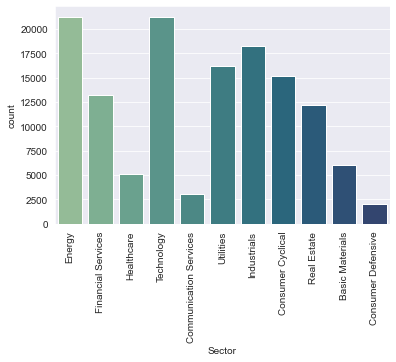

In [354]:
revenue_dist = df[df.Revenuegrowth > 0.18]
sns.countplot(x='Sector', data= revenue_dist, palette="crest")
plt.xticks(rotation=90);

* Technology and energy are the two sectors with the highest Revenue Growth
* Lets check the outliers from before:

In [338]:
r_industry = revenue_dist.groupby(['Sector', 'Industry', 'Symbol'])['Revenuegrowth'].mean().sort_values(ascending=False)
r_industry.nlargest(10)

Sector                  Industry             Symbol
Consumer Cyclical       Travel Services      NCLH      270.791
                                             RCL        41.901
Communication Services  Entertainment        LYV         6.699
Energy                  Oil & Gas E&P        CTRA        5.204
Consumer Cyclical       Travel Services      CCL         1.983
Basic Materials         Specialty Chemicals  ALB         1.519
Energy                  Oil & Gas E&P        COP         1.237
                                             EQT         1.092
Real Estate             REIT—Hotel & Motel   HST         1.052
                        REIT—Diversified     VICI        1.000
Name: Revenuegrowth, dtype: float64

#### Top 10 companies with the highest Revenue Growth in this period(2019-2023):
1. NCLH
2. RCL
3. LYV
4. CTRA
5. CCL
6. ALB
7. COP
8. EQT
9. HST
10. VICI

#### The growth of 'NCLH' and 'RCL' revenue during the years of the covid-19 pandemic seems unusual for Travel Services companies, lets check why:

In [339]:
# converting column datatype
df['Year'] = df['Year'].astype(int)

travels_symbol = df.where(df['Symbol'].isin(['NCLH','RCL'])).groupby(['Year','Symbol'])['Revenuegrowth'].mean()
travels_symbol

Year    Symbol
2019.0  NCLH      270.791
        RCL        41.901
2020.0  NCLH      270.791
        RCL        41.901
2021.0  NCLH      270.791
        RCL        41.901
2022.0  NCLH      270.791
        RCL        41.901
2023.0  NCLH      270.791
        RCL        41.901
Name: Revenuegrowth, dtype: float64

* Throughout the years, I expected to see a difference in revenue growth, which did not happend
* Let's compare Volumes between years:

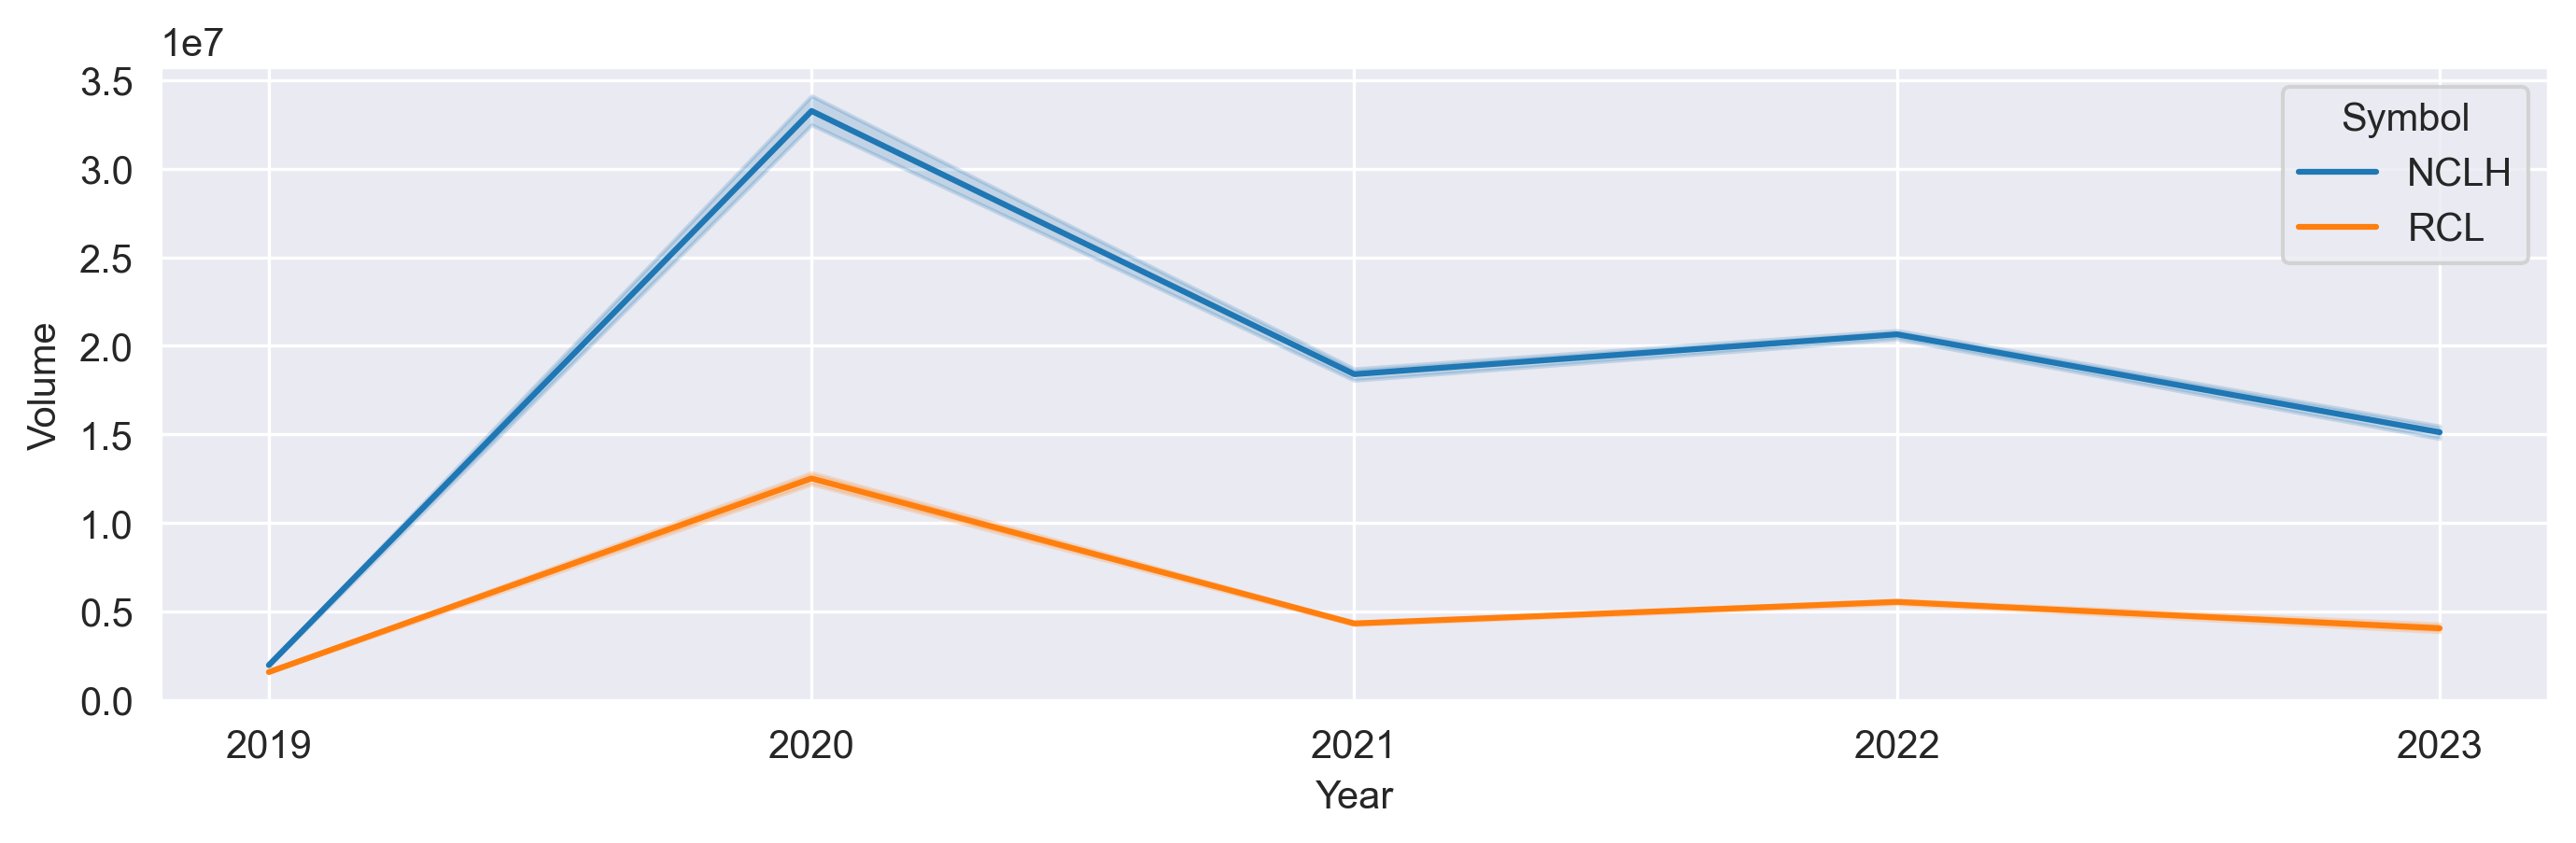

In [340]:
symbols = [ 'NCLH','RCL']
Year = [2019,2020,2021,2022,2023]
plt.subplots(1, 1, figsize=[11, 3], dpi=300)
sns.lineplot(x='Year', y='Volume', data=df, hue='Symbol', hue_order=symbols, errorbar=('ci', 40))
plt.xticks(Year);

* We can see masive increse in 2019, probably the reason why the value is high throughout the period

## 5.3. <a id="Marketcap">Marketcap distribution</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### Market capitalization: Market cap is a measure of a company's size and can be used to determine whether a stock is considered a large-cap, mid-cap, or small-cap stock

## Marketcap distribution

In [341]:
df.Marketcap.describe()

count    4.979560e+05
mean     7.026183e+10
std      1.606651e+11
min      5.518767e+09
25%      1.658893e+10
50%      3.044167e+10
75%      6.295652e+10
max      2.070439e+12
Name: Marketcap, dtype: float64

<AxesSubplot: xlabel='Marketcap'>

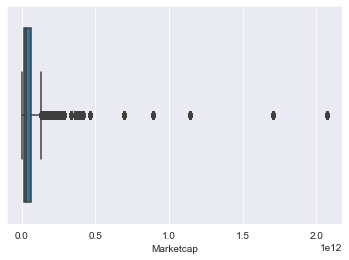

In [342]:
sns.boxplot(data=df, x="Marketcap")

### Marketcap outliers 

In [343]:
marketcap_outliers = df[df.Marketcap > 2.5e+11]

print(marketcap_outliers.loc[:,['Symbol','Shortname']].Symbol.unique())
print(marketcap_outliers.loc[:,['Symbol','Shortname']].Shortname.unique())

['AAPL' 'MSFT' 'GOOG' 'GOOGL' 'AMZN' 'BRK-B' 'JNJ' 'XOM' 'UNH' 'JPM' 'WMT'
 'NVDA' 'PG' 'MA' 'CVX' 'LLY' 'HD' 'ABBV' 'MRK' 'BAC' 'PFE' 'KO']
['Apple Inc.' 'Microsoft Corporation' 'Alphabet Inc.' 'Amazon.com, Inc.'
 'Berkshire Hathaway Inc. New' 'Johnson & Johnson'
 'Exxon Mobil Corporation' 'UnitedHealth Group Incorporated'
 'JP Morgan Chase & Co.' 'Walmart Inc.' 'NVIDIA Corporation'
 'Procter & Gamble Company (The)' 'Mastercard Incorporated'
 'Chevron Corporation' 'Eli Lilly and Company' 'Home Depot, Inc. (The)'
 'AbbVie Inc.' 'Merck & Company, Inc.' 'Bank of America Corporation'
 'Pfizer, Inc.' 'Coca-Cola Company (The)']


#### There are 5 companies with a significant marketcap (above 500 Billion) compared to the rest:
* Alphabet Inc. (GOOGL/GOOG)
* Apple Inc. (AAPL)
* Microsoft Corporation (MSFT)
* Amazon.com, Inc. (AMZN)
* Berkshire Hathaway(BRK.B)


 #### More companies with big marketcap (between 250B to 500B):
 
* Johnson & Johnson(JNJ)
* Exxon Mobil Corporation (XOM)
* UnitedHealth Group Incorporated (UNH)
* JP Morgan Chase & Co.(JPM)
* Walmart Inc.(WMT) 
* NVIDIA Corporation (NVDA)
* Procter & Gamble Company(The) (PG)
* Mastercard Incorporated (MA)
* Chevron Corporation (CVX)
* Eli Lilly and Company (LLY)
* Home Depot, Inc. (The) (HD)
* AbbVie Inc. (ABBV)
* Merck & Company, Inc. (MRK)
* Bank of America Corporation (BAC)
* Pfizer, Inc. (PFE)
* Coca-Cola Company (The) (KO)



In [344]:
#marketcap_outliers = df.loc[df['Symbol'].isin(['GOOGL','GOOG','AAPL','MSFT','AMZN','BRK.B']), :]
df_marketcap = df[~df.Symbol.isin(['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'BRK-B', 'JNJ', 'XOM',
       'UNH', 'JPM', 'WMT', 'NVDA', 'PG', 'MA', 'CVX', 'LLY', 'HD',
       'ABBV', 'MRK', 'BAC', 'PFE', 'KO'])]

<AxesSubplot: xlabel='Marketcap'>

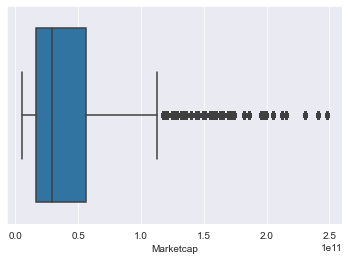

In [345]:
sns.boxplot(data=df_marketcap, x="Marketcap")

In [346]:
df_marketcap.Marketcap.describe()

count    4.756700e+05
mean     4.510271e+10
std      4.517525e+10
min      5.518767e+09
25%      1.604621e+10
50%      2.870222e+10
75%      5.583716e+10
max      2.479506e+11
Name: Marketcap, dtype: float64

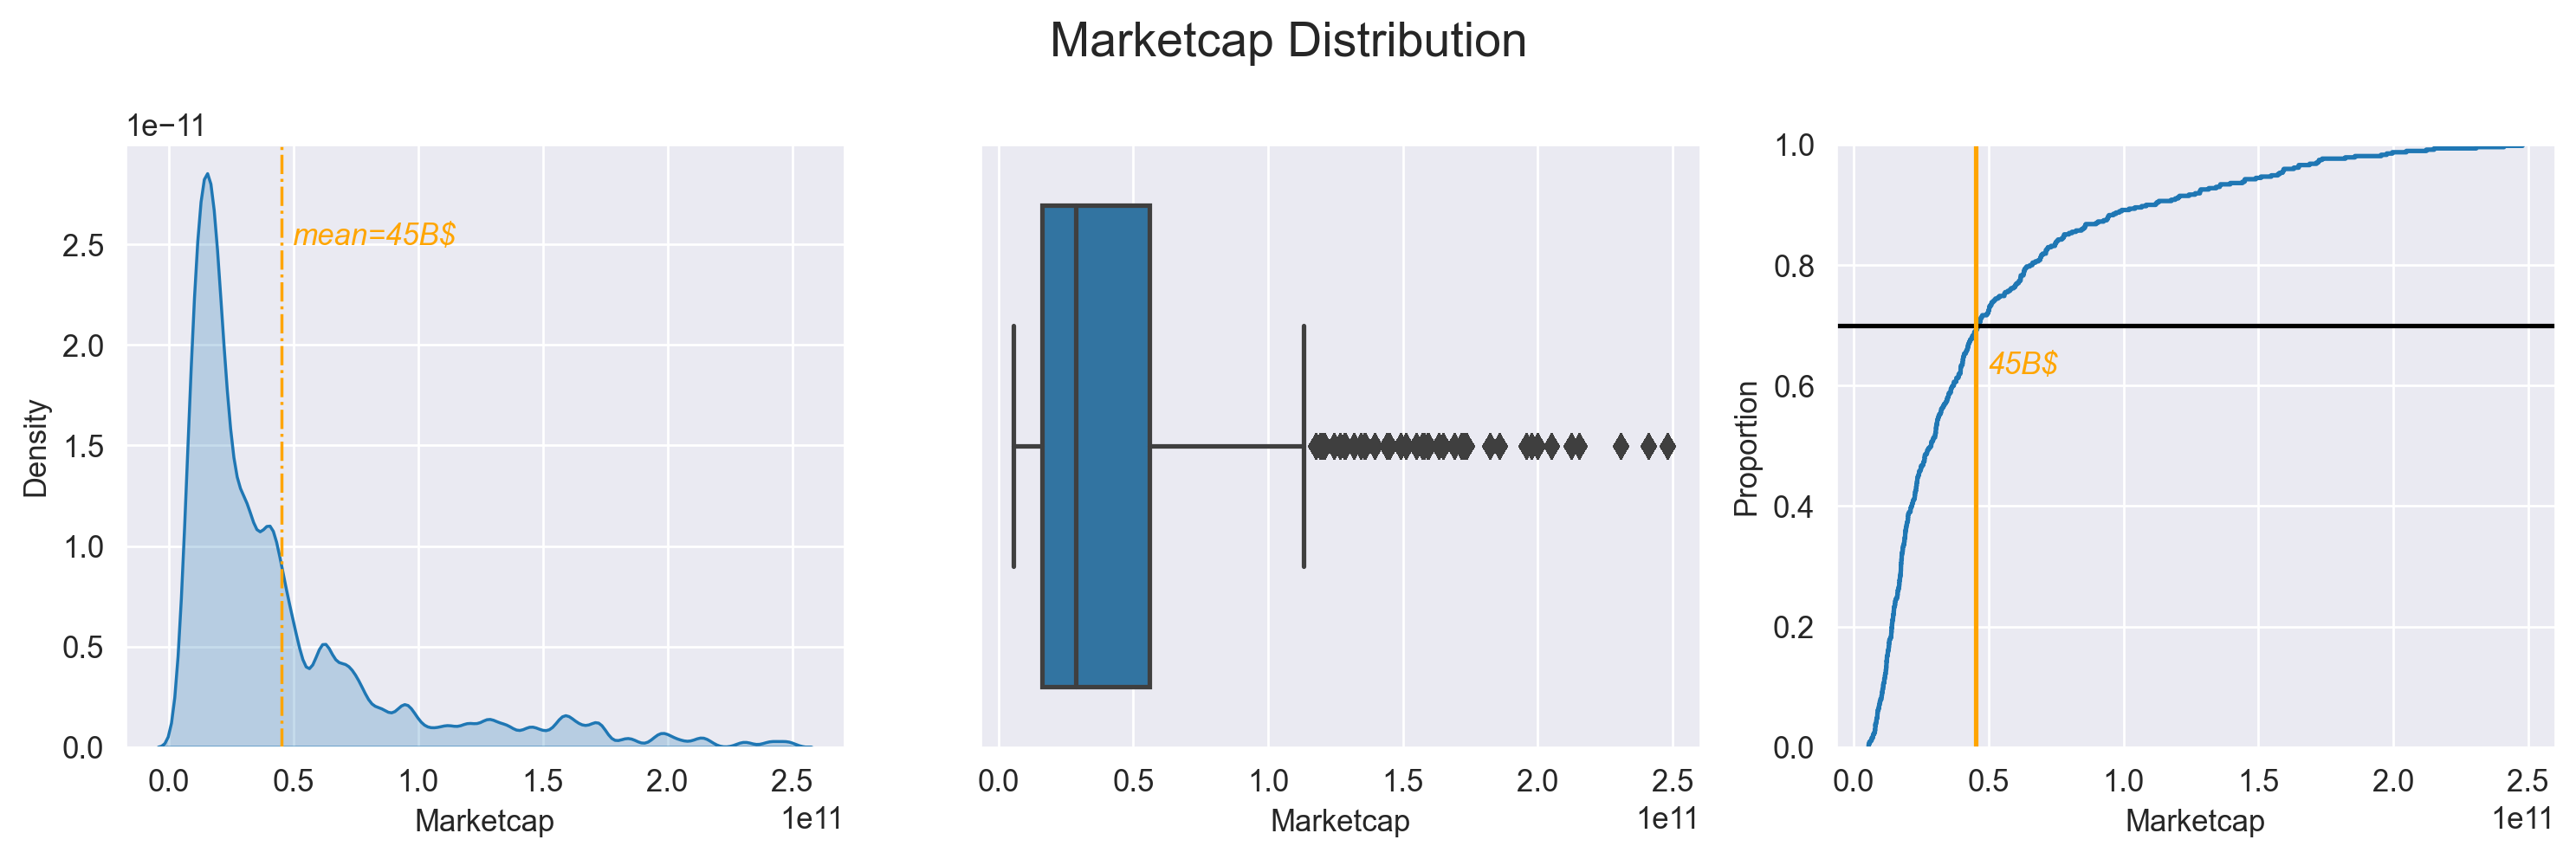

In [347]:
# set style
sns.set_style('darkgrid')

# creating 3 subplots axes[0], axes[1], axes[2]
fig, axes = plt.subplots(1, 3, figsize=[12, 4], dpi=250)

# main title:
fig.suptitle("Marketcap Distribution", fontsize=16)

# the plots:
sns.kdeplot(data=df_marketcap, x="Marketcap", fill=True, ax=axes[0])
sns.boxplot(data=df_marketcap, x="Marketcap", ax=axes[1])
sns.ecdfplot(data=df_marketcap, x="Marketcap", ax=axes[2])

# histogram customization:
mean_price = np.round(df_marketcap["Marketcap"].mean(), 2)
axes[0].axvline(mean_price, color="orange", linestyle="-.", linewidth=1)

axes[0].text(
    x= 1.1 * mean_price , y= 2.5 * 1e-11 , s=f"mean=45B$", style="italic", color="orange"
)

# ecdf customization
axes[2].axhline(0.7, color="black")
axes[2].axvline(mean_price, color="orange")
axes[2].text(x=1.1*mean_price, y=0.62, s=f"45B$", style="italic", color="orange")

plt.tight_layout()

#### Observations:

* From the histogram and the box plot we could see that the Marketcap is right skewed, with many outliers, we could see that the range is from 0 to 250B (after I removed the outliers above 250B), and the mean value is around 45B
* From the ECDF price plot we could see that 70% from the companies are below the 45B Marketcap
* 75% of the companies are up to 55B Marketcap, and the mean is around 45B. That means all the companies with larger marketcap than 55B are considered a large-cap stock

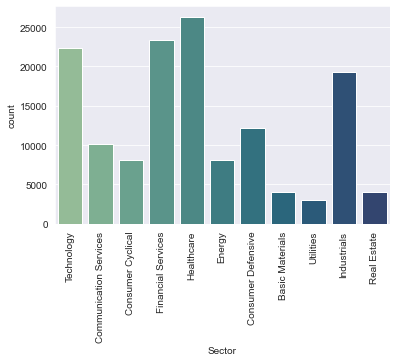

In [348]:
marketcap_dist = df[df.Marketcap > 5.583716e+10]
sns.countplot(x='Sector', data= marketcap_dist, palette="crest")
plt.xticks(rotation=90);

* Technology, Financial Services, Healthcare and Industrials  are the sectors with the highest Marketcap
* Lets check the  large-cap Industries:

In [349]:
m_mean = marketcap_dist.where(marketcap_dist['Sector'].isin(['Technology','Financial Services','Healthcare', 'Industrials'])).groupby(['Sector', 'Industry'])['Marketcap'].mean().sort_values(ascending=False)
m_mean.nlargest(10)

Sector              Industry                  
Technology          Consumer Electronics          2.070439e+12
                    Software—Infrastructure       6.983264e+11
Financial Services  Insurance—Diversified         6.958762e+11
Healthcare          Drug Manufacturers—General    2.543807e+11
Financial Services  Banks—Diversified             2.378085e+11
Technology          Communication Equipment       2.048915e+11
Healthcare          Diagnostics & Research        1.987193e+11
Financial Services  Credit Services               1.891489e+11
Healthcare          Healthcare Plans              1.842258e+11
Technology          Semiconductors                1.622388e+11
Name: Marketcap, dtype: float64

* The companies with the largest Marketcap were detailed at the beginning of the analysis. Here are the industries with the largest Marketcap volume. 
* Top three Industries:
1. Consumer Electronics 
2. Software—Infrastructure
3. Insurance—Diversified

## 5.4. <a id="Volume">Volume distribution</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### Volume: The volume (Volume column) of a stock can be used to measure the level of interest in the stock. Stocks with high volume are generally considered to be more liquid and easier to trade.

Let's examine the changes in volume during the years of the sectors with the highest Marketcap/Revenue growth:

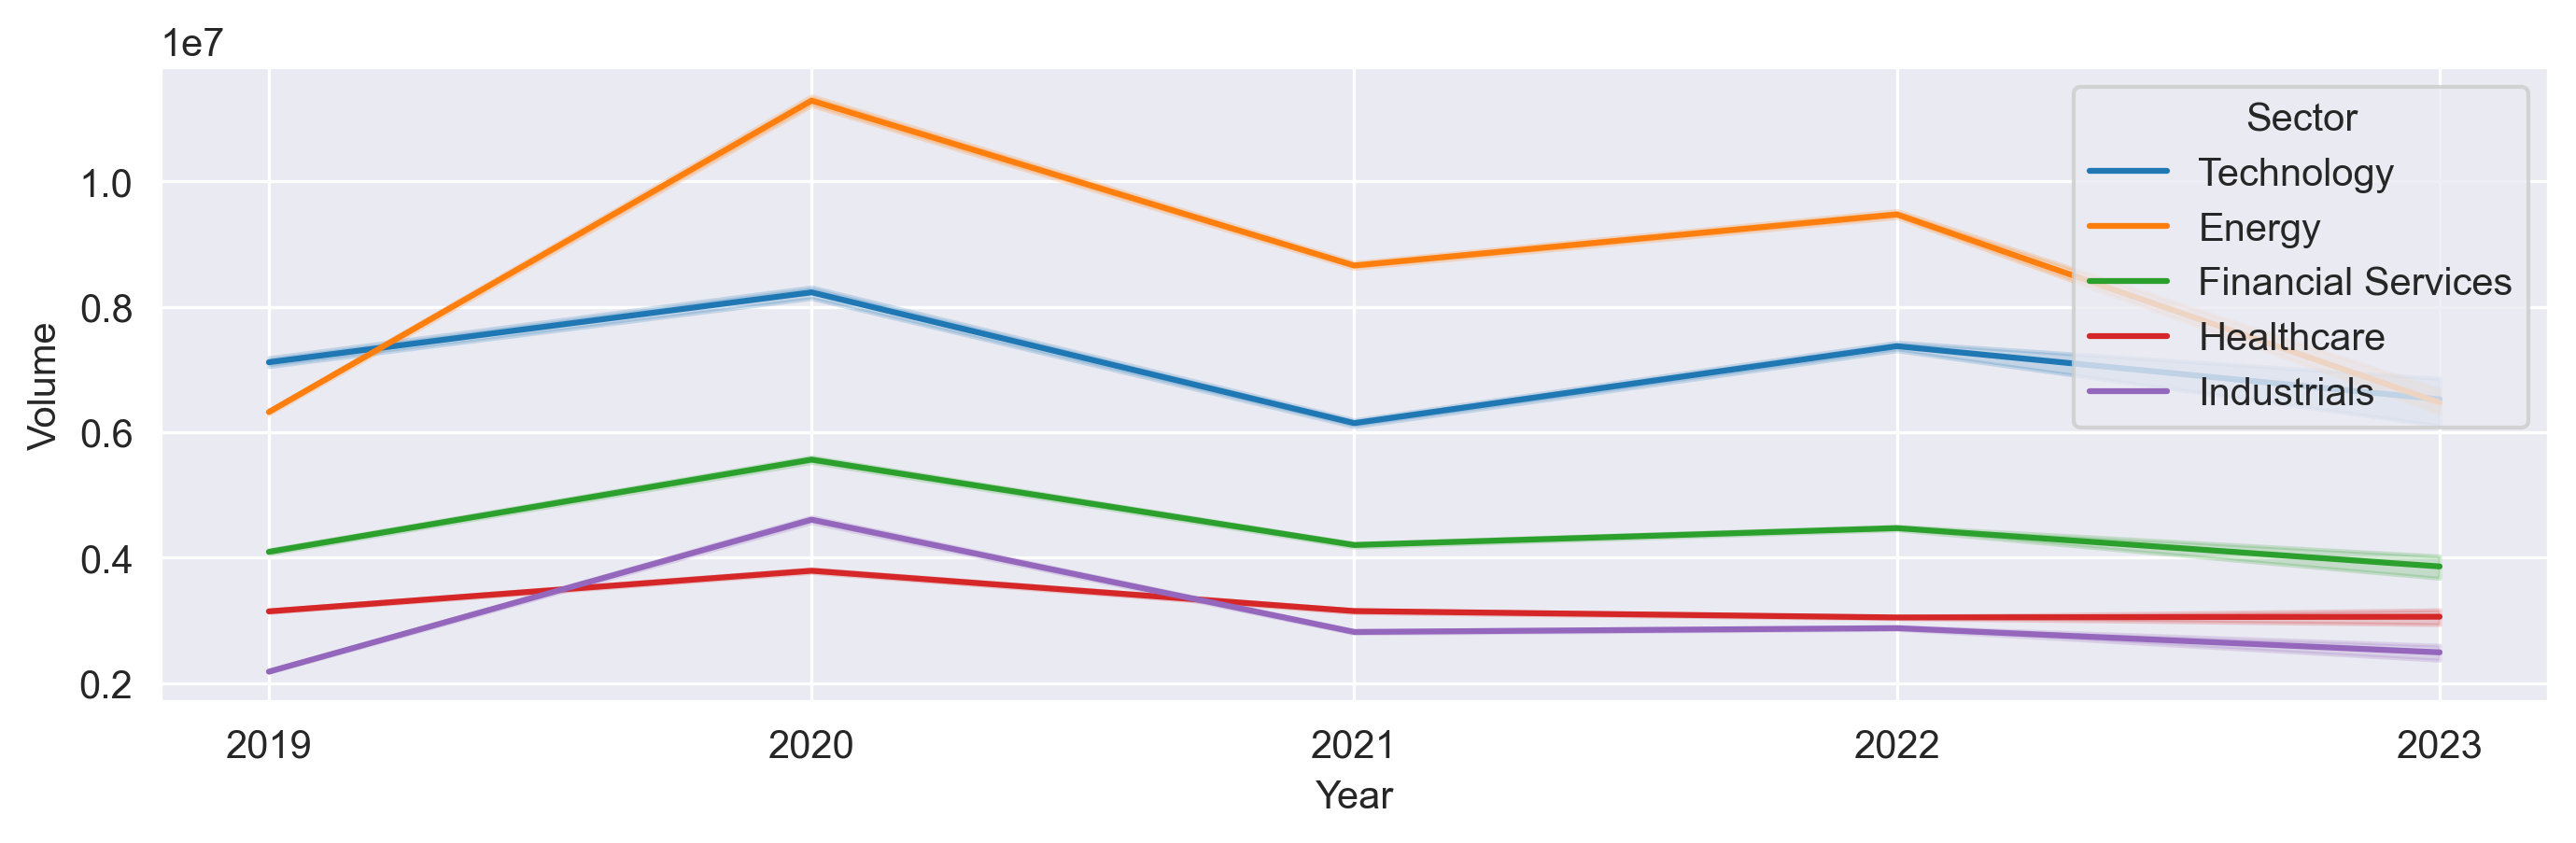

In [350]:
top_sectors = [ 'Technology','Energy', 'Financial Services', 'Healthcare', 'Industrials']
Year = [2019,2020,2021,2022,2023]
plt.subplots(1, 1, figsize=[11, 3], dpi=300)
sns.lineplot(x='Year', y='Volume', data=df, hue='Sector', hue_order=top_sectors, errorbar=('ci', 40))
plt.xticks(Year);

#### Observations:

* In 2019, all sectors experienced an increase, with Energy the most
* In 2020, all sectors experienced an decrease (This year the covid-19 pandemic began. It may be the cause, but I don't have any evidence for this in the dataset)
* There will be a good recovery in the Technology and Energy sector in 2021
* All sectors are experiencing sharp declines in 2022, but the energy sector experiences the sharpest decline

### Numerical variables:

## 5.5. <a id="Heatmap">Correlation Heatmap</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

let's try create a heatmap with Pearson's correlation:

<AxesSubplot: >

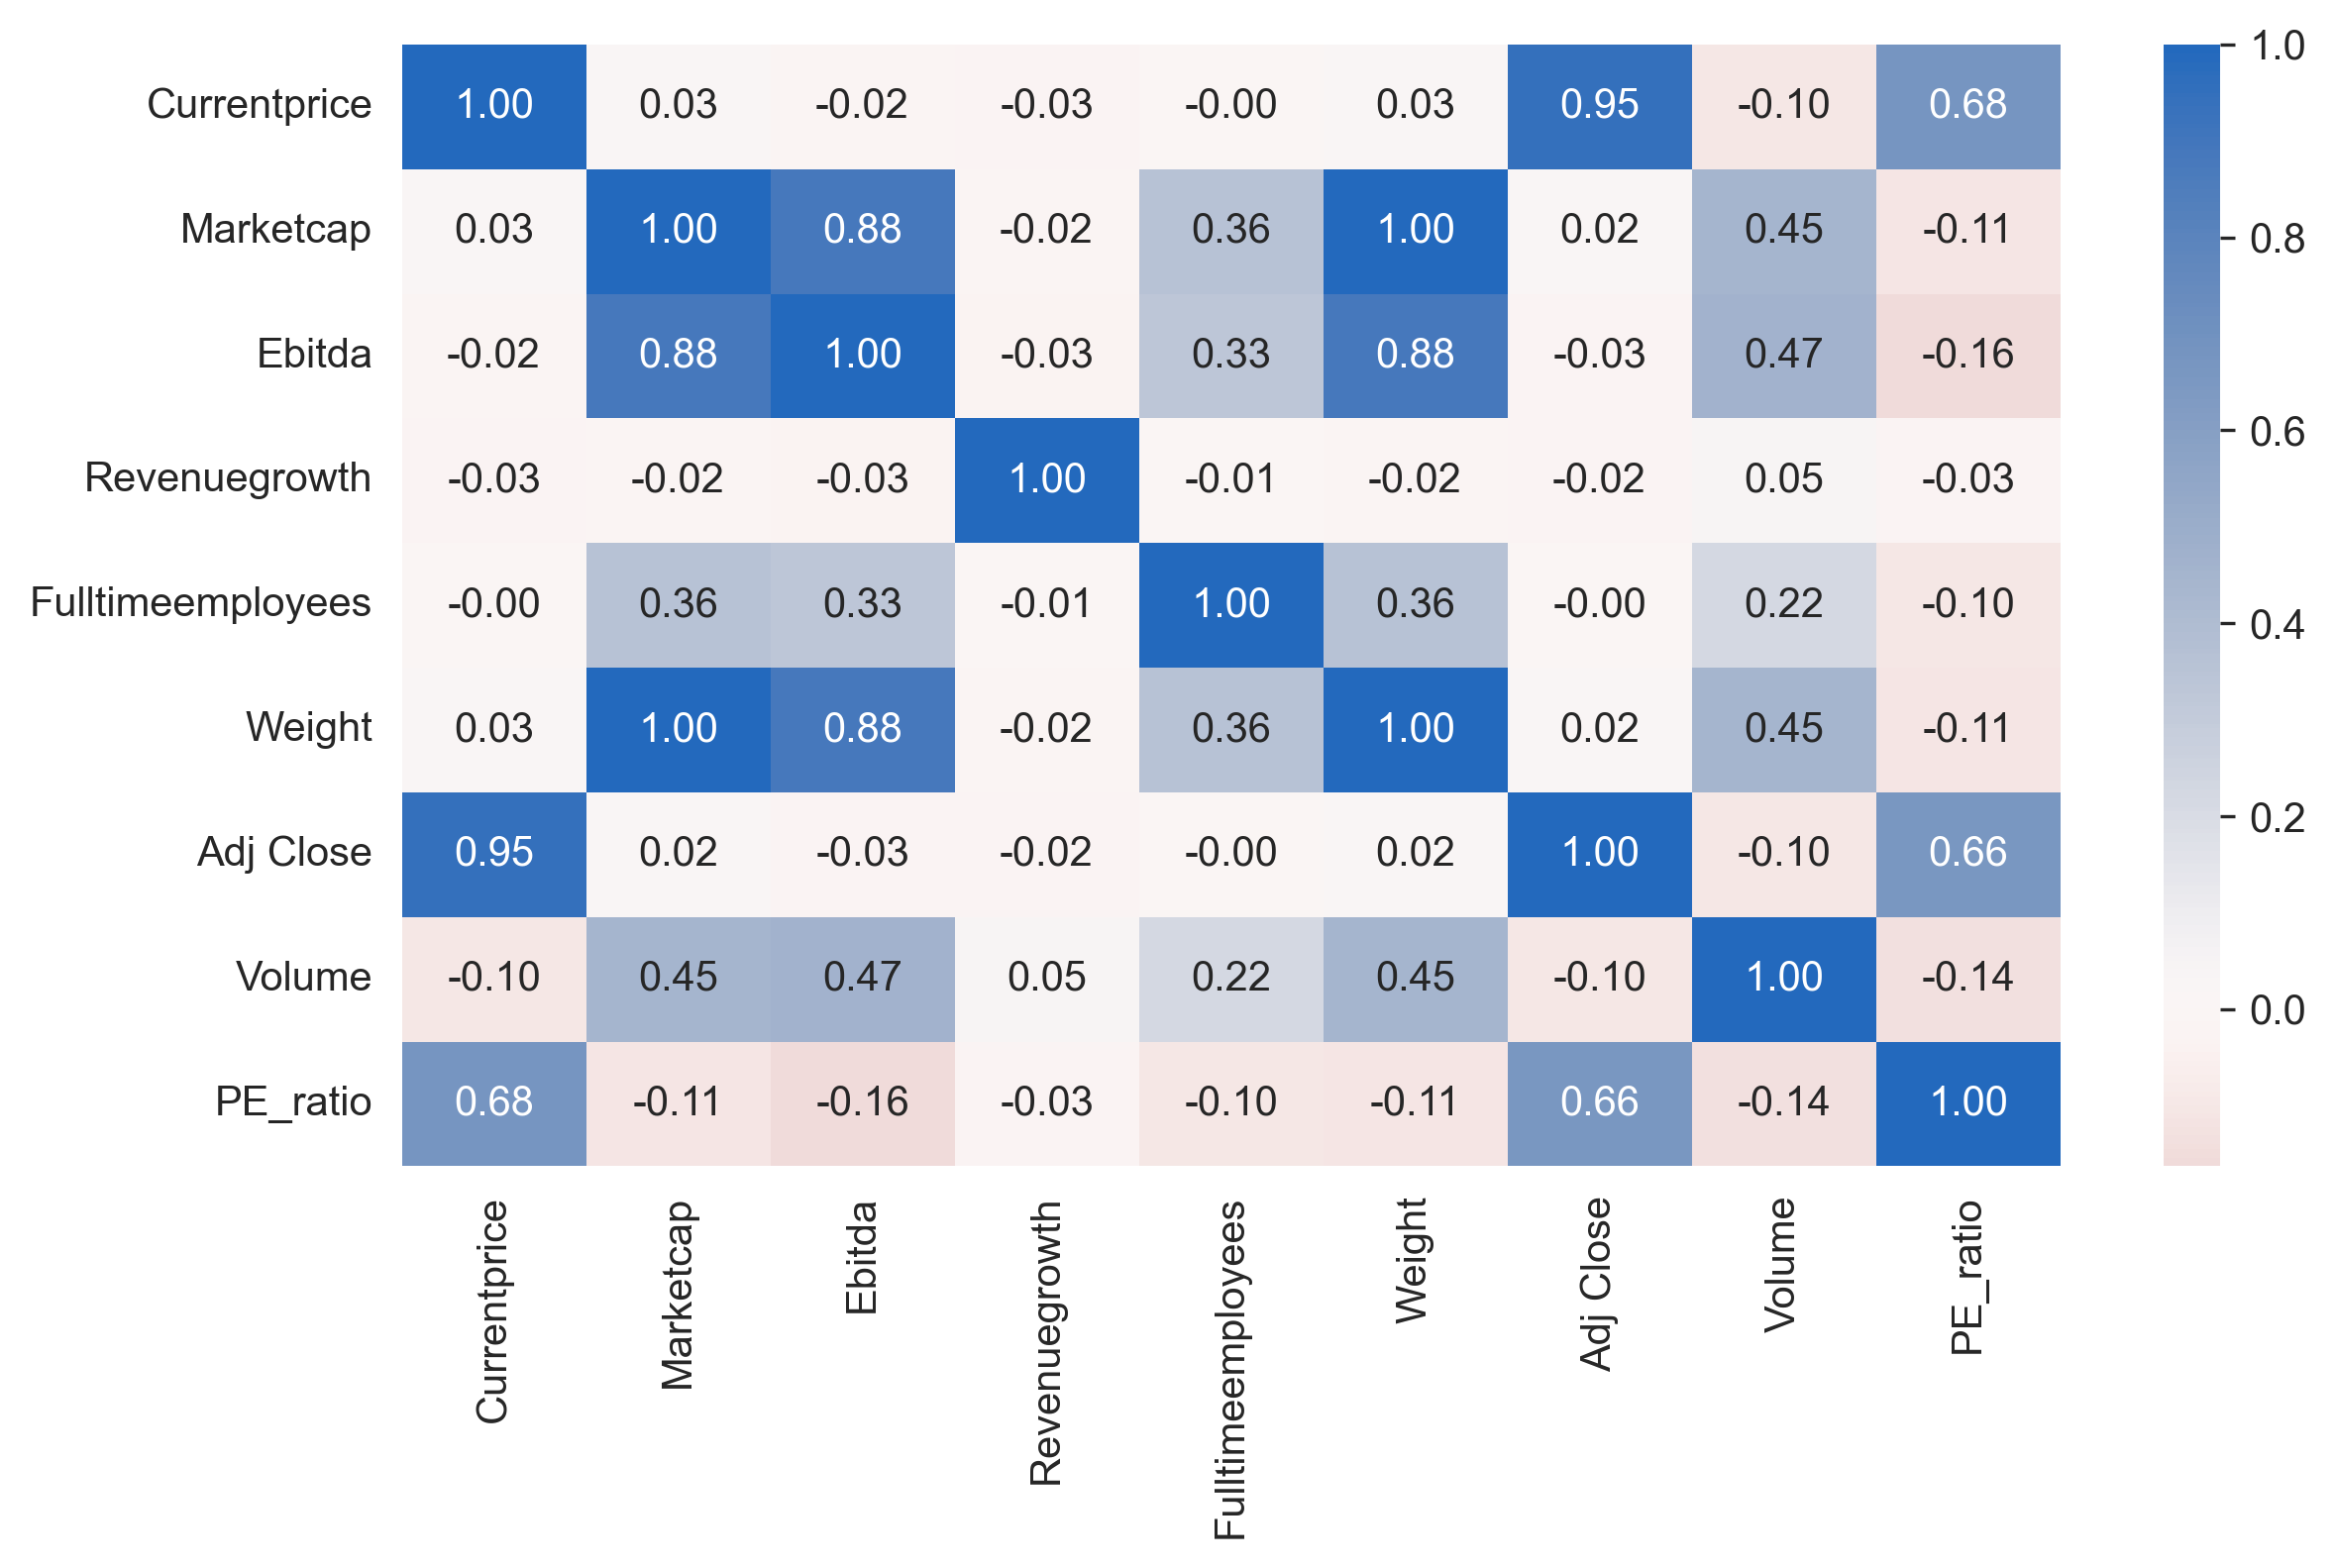

In [351]:
numeric_vars = ['Currentprice', 'Marketcap','Ebitda','Revenuegrowth','Fulltimeemployees','Weight', 'Adj Close', 'Volume', 'PE_ratio']

# correlation plot
plt.figure(figsize=[9, 5], dpi=300)
sns.heatmap(
    df[numeric_vars].corr(), annot=True, fmt=".2f", cmap="vlag_r", center=0
)

### In order to understand the high correlation variables, let's look at the following:

* EBITDA - Marketcap: A high correlation between EBITDA and market capitalization could mean that the market values the company based on its earnings potential. In other words, as EBITDA increases, market capitalization may also increase. However, this correlation should be considered in the context of other factors that could influence market capitalization, such as industry trends, company performance, and investor sentiment


* EBITDA - Weight: A high correlation between EBITDA and weight (percentage of participation on the S&P index) could mean that companies with higher EBITDA are more likely to be included in the S&P index or have a higher weight in the index. This could be because companies with higher EBITDA are considered to be financially stronger and therefore, more attractive to investors. However, it's important to note that other factors such as market capitalization, industry trends, company performance, and investor sentiment are also important factors that influence a company's inclusion or weight in an index


* Weight - Marketcap: A perfect correlation between market capitalization and weight (percentage of participation on the S&P index) would mean that  the S&P index weight is based solely on market capitalization, and as market capitalization of a company increases, so does its weight in the index. This is not uncommon as market capitalization is one of the most common criteria for determining the weight of a company in a stock market index


* Adj Close - Current price: A high correlation between the adjusted close price and current price of a stock could mean that the current price of the stock is closely related to its historical adjusted close price. This may be because the current price is influenced by factors such as the stock's historical performance and investor sentiment, which are reflected in the adjusted close price. However, it's important to note that other factors such as current economic conditions, industry trends, and company-specific events can also affect the current price of a stock and may not be reflected in the adjusted close price


* PE_ratio - Current price: A correlation of 0.68 between the price-to-earnings ratio (PE ratio) and current price of a stock could mean that there is a moderate positive correlation between the two variables. This means that as the PE ratio increases, the current stock price also tends to increase, and vice versa. However, it's important to keep in mind that correlation does not imply causation, so other factors may be influencing both the PE ratio and current price. Additionally, a correlation of 0.68 is not a perfect correlation, so there may be other factors that are influencing the stock price, and the PE ratio may not be the main driver of the stock price


### Summary:

* A high correlation between EBITDA and market capitalization could mean that the market values the company based on its earnings potential


* A high correlation between EBITDA and weight (percentage of participation on the S&P index) could mean that companies with higher EBITDA are more likely to be included in the S&P index or have a higher weight in the index


* A perfect correlation between market capitalization and weight would mean that  the S&P index weight is based solely on market capitalization, and as market capitalization of a company increases, so does its weight in the index


* A high correlation between the adjusted close price and current price of a stock could mean that the current price of the stock is closely related to its historical adjusted close price


*  A correlation of 0.68 between the PE ratio and current price of a stock means that as the PE ratio increases, the current stock price also tends to increase, and vice versa


## 5.6. <a id="Matrix">Correlation Matrix</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

stocks.shape= (497956, 26)
stocks_samp.shape= (500, 26)


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


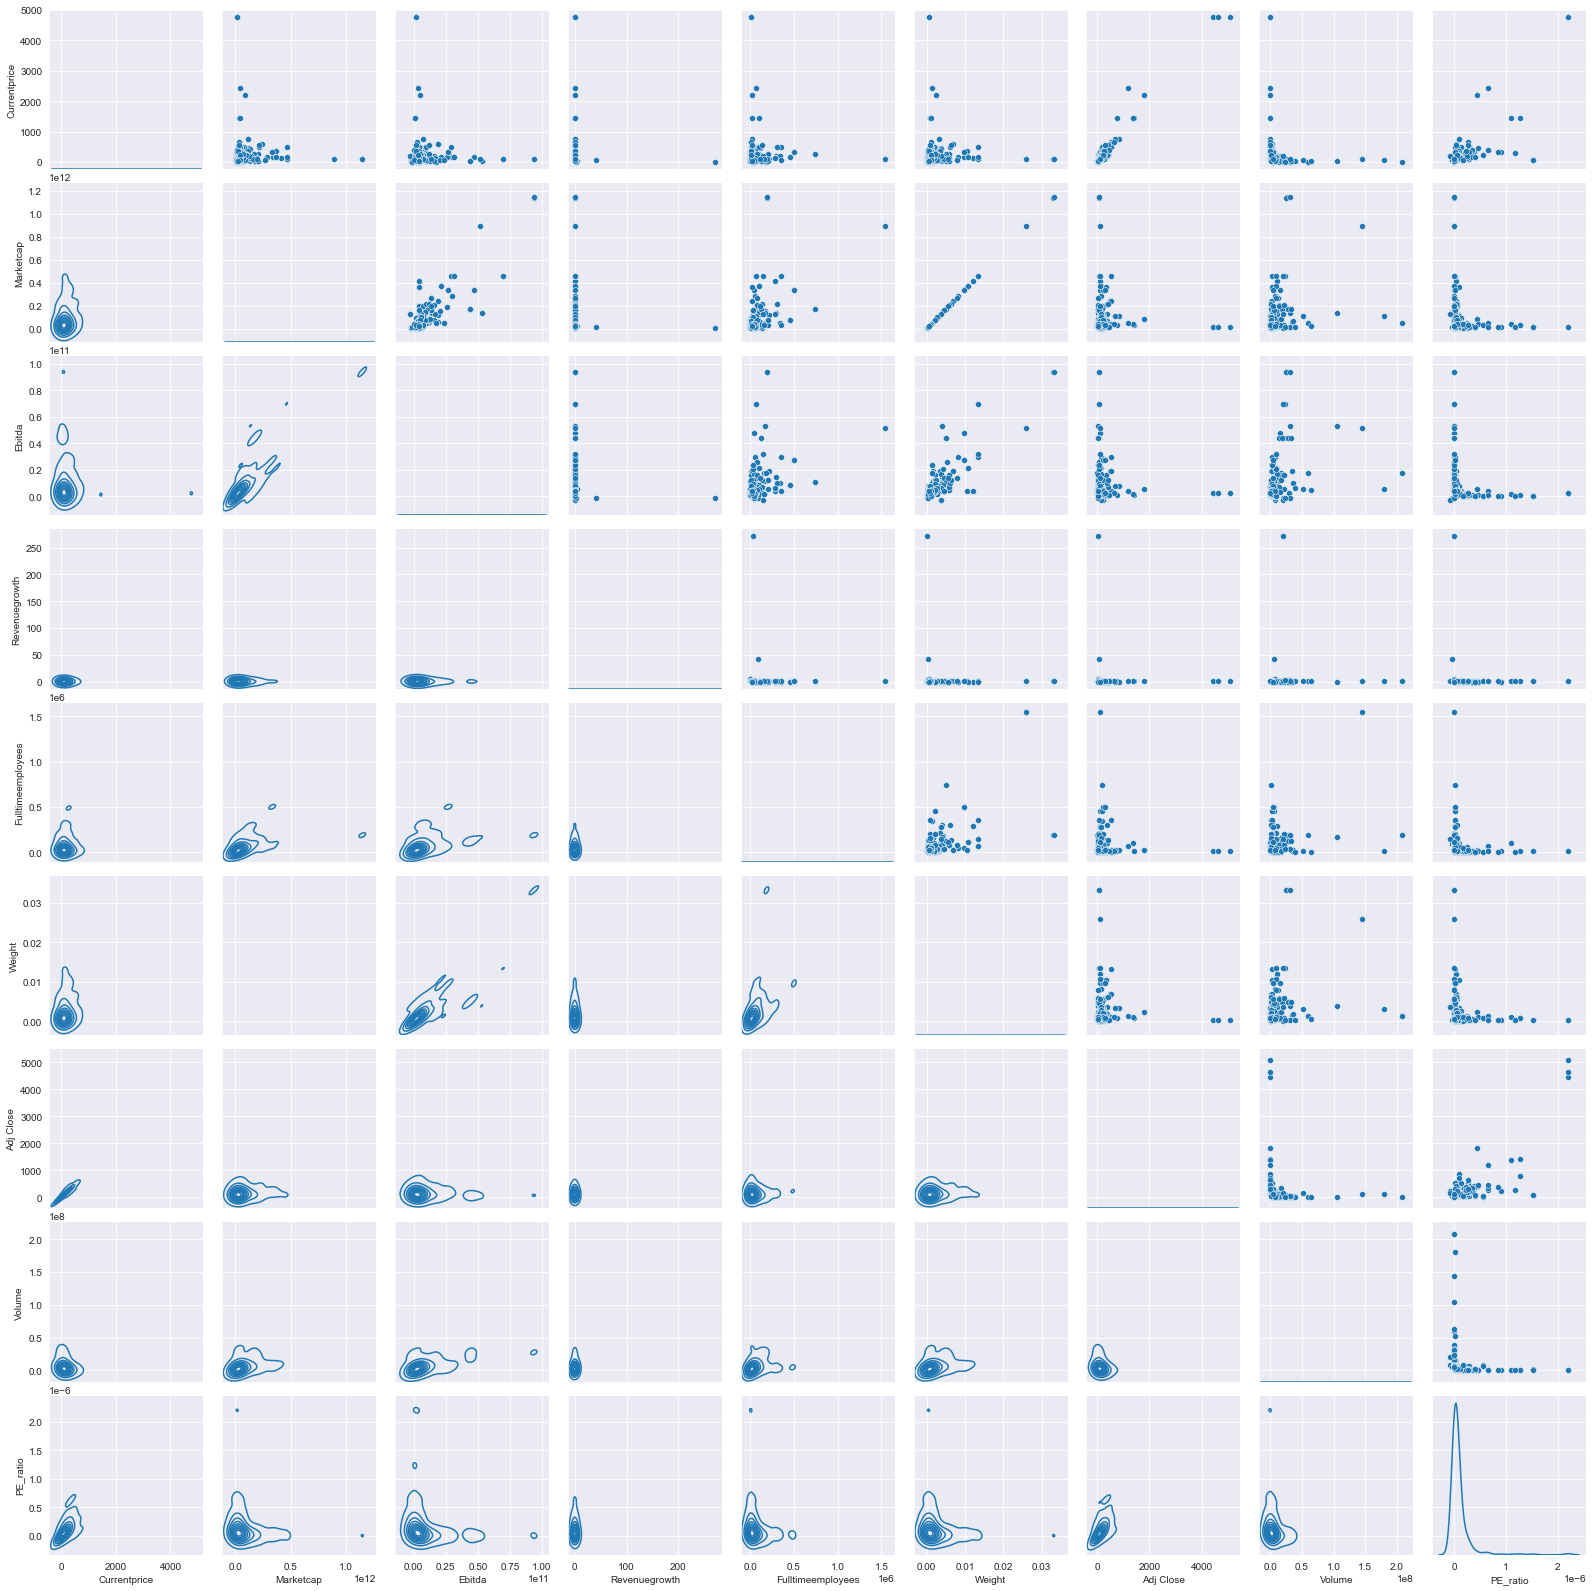

In [352]:
# plot matrix: sample 500 stocks so that plots are clearer and they render faster
print("stocks.shape=", df.shape)
stocks_samp = df.sample(n=500, replace=False)
print("stocks_samp.shape=", stocks_samp.shape)

g = sns.PairGrid(data=stocks_samp, vars=numeric_vars)
g.map_diag(sns.kdeplot, warn_singular=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

* The sample shows the same correlations as I described above

# 6. <a id="Conclusions">Conclusions</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

# Conclusions

* All companies with PE_ratio higher than 0.0000005 are considered overvalued


* The mean revenue growth is 0.13%, 75% of the stocks are below 0.18%, and stocks above 0.18% showed better performance than others


* Technology and energy are the two sectors with the highest Revenue Growth


* 75% of the companies are up to 55B Marketcap, and the mean is around 45B. That means all the companies with larger marketcap than 55B are considered  a large-cap stock


* Technology, Financial Services, Healthcare, and Industrials are the sectors with the highest Marketcap


* Consumer Electronics, Software—Infrastructure, and Insurance—Diversified are the Industries with the highest Marketcap


* In 2019, all sectors experienced an increase, with Energy the most


* In 2020, all sectors experienced a decrease (This year the covid-19 pandemic began. It may be the cause, but I don't have any evidence for this in the dataset)

* All sectors are experiencing sharp declines in 2022, but the energy sector experiences the sharpest decline